#  Tymoteusz Hanusiak Peter Juruś 

## opis danych


Dane pochodzą z **World Bank Open Data (World Development Indicators)** i przedstawiają podstawowe wskaźniki makroekonomiczne i fiskalne dla różnych krajów w ujęciu rocznym.  
Zbiór obejmuje lata **2010–2025** (dla części krajów dane są prognozowane).  

---

### Zmienne w  danych

| **Nazwa kolumny** | **Opis** |
|--------------------|----------|
| `country_name` | Nazwa kraju |
| `country_id` | Kod ISO kraju |
| `year` | Rok obserwacji |
| `Inflation_CPI` | Inflacja mierzona wskaźnikiem CPI (%) |
| `GDP_usd` | Produkt krajowy brutto w USD |
| `GDP_per_capita_usd` | PKB per capita w USD |
| `Unemployment_Rate` | Stopa bezrobocia (%) |
| `Interest_Rate_perc` | Podstawowa stopa procentowa (%) |
| `Inflation_deflator` | Deflator PKB (%) |
| `GDP_Growth_perc` | Roczne tempo wzrostu PKB (%) |
| `Current_Account_Balance_perc` | Bilans rachunku bieżącego (% PKB) |
| `Government_Expense_gdp_perc` | Wydatki rządowe (% PKB) |
| `Government_Revenue_perc_of_gdp` | Dochody rządowe (% PKB) |
| `Tax_Revenue_gdp_perc` | Dochody podatkowe (% PKB) |
| `Gross_National_Income_USD` | Dochód narodowy brutto (USD) |
| `Public_Debt_perc_of_gdp` | Dług publiczny (% PKB) |

---

- **WAZNE!!** Inflation-adjusted lending rate ( Czyli stopa procentowa to jest realna adjustowana o inflacje )


**link** --------> https://www.kaggle.com/datasets/tanishksharma9905/global-economic-indicators-20102025 

### cel analizy 

- Celem projektu jest ocena stabilności fiskalnej krajów ( porzadkowanie liniowe) a takze zidentyfikowanie grup krajów o podobnym poziomie stabilności fiskalnej (clustering ) na podstawie wybranych wskaźników gospodarczych pochodzących z danych banku swiatowego z lat 2010–2025.


# preprocess 

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


<Axes: >

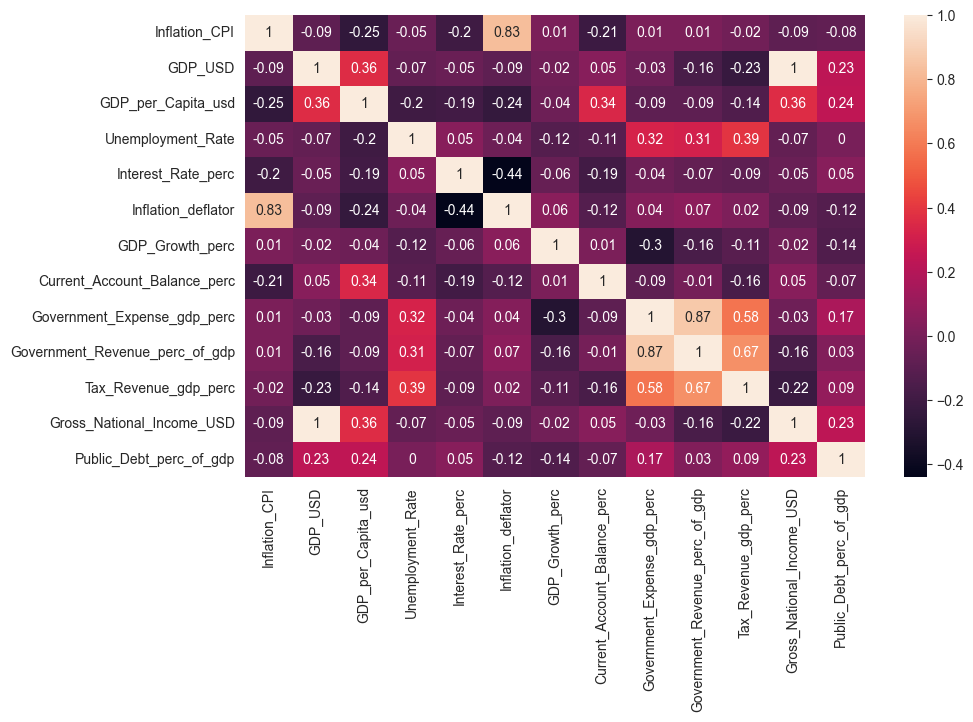

In [73]:

data = pd.read_csv('data_world_bank.csv',parse_dates=['year'])

data.dropna(inplace=True) # usuwanie nanow 

plt.figure(figsize=(10,6))


sns.heatmap(data.select_dtypes(include=[np.number]).corr().round(2),annot=True)



- usunelismy od razu dane ktore sa ze soba silnie skorelowane , a takze mniej znaczacy faktor z punktu widzenia stabilnosci fiskalnej kraju czyli current account PKB i pkb_per_capita

<Axes: >

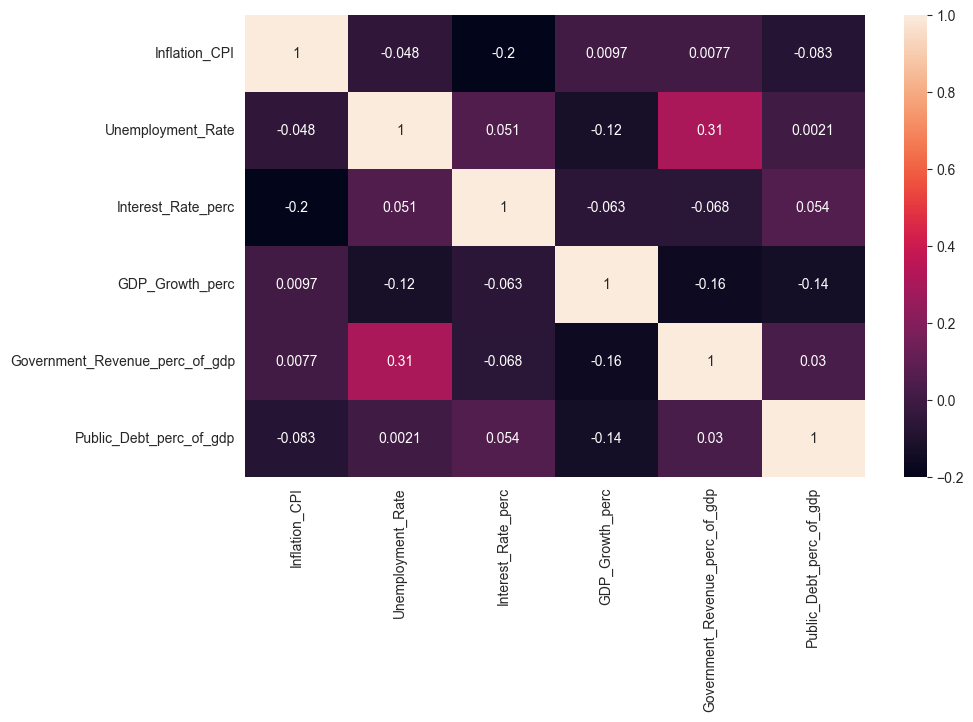

In [74]:
data.drop(columns=['country_id','Inflation_deflator','Government_Expense_gdp_perc','Tax_Revenue_gdp_perc','Gross_National_Income_USD','Current_Account_Balance_perc','GDP_per_Capita_usd','GDP_USD'],inplace=True) 

plt.figure(figsize=(10,6))

sns.heatmap(data.select_dtypes(include=[np.number]).corr(),annot=True)

In [75]:
continent_map = {
    'Albania': 'Europe', 'Armenia': 'Asia', 'Australia': 'Oceania', 'Azerbaijan': 'Asia',
    'Burkina Faso': 'Africa', 'Bulgaria': 'Europe', 'Bahrain': 'Asia', 'Bahamas, The': 'North America',
    'Bosnia and Herzegovina': 'Europe', 'Belarus': 'Europe', 'Belize': 'North America', 'Brazil': 'South America',
    'Barbados': 'North America', 'Bhutan': 'Asia', 'Botswana': 'Africa', 'Canada': 'North America',
    'Switzerland': 'Europe', 'Colombia': 'South America', 'United Kingdom': 'Europe', 'Georgia': 'Asia',
    'Guatemala': 'North America', 'Croatia': 'Europe', 'Hungary': 'Europe', 'India': 'Asia',
    'Iraq': 'Asia', 'Iceland': 'Europe', 'Jamaica': 'North America', 'Jordan': 'Asia',
    'Kyrgyz Republic': 'Asia', 'Korea, Rep.': 'Asia', 'St. Lucia': 'North America', 'Sri Lanka': 'Asia',
    'Lesotho': 'Africa', 'Moldova': 'Europe', 'Maldives': 'Asia', 'Mexico': 'North America',
    'Mongolia': 'Asia', 'Mozambique': 'Africa', 'Mauritius': 'Africa', 'Malawi': 'Africa',
    'Malaysia': 'Asia', 'New Zealand': 'Oceania', 'Peru': 'South America', 'Philippines': 'Asia',
    'Papua New Guinea': 'Oceania', 'Romania': 'Europe', 'Russian Federation': 'Europe', 
    'Singapore': 'Asia', 'Solomon Islands': 'Oceania', 'Eswatini': 'Africa', 'Thailand': 'Asia',
    'Tonga': 'Oceania', 'Uganda': 'Africa', 'Ukraine': 'Europe', 'Uruguay': 'South America',
    'United States': 'North America', 'Vanuatu': 'Oceania', 'South Africa': 'Africa', 'Zambia': 'Africa'
}

data['continent'] = data['country_name'].map(continent_map)


data['year2'] = data['year'].dt.year 


In [76]:
data[data.select_dtypes(np.number).columns] = data[data.select_dtypes(np.number).columns].round(2) # rounding do 2 

<Axes: xlabel='country_name'>

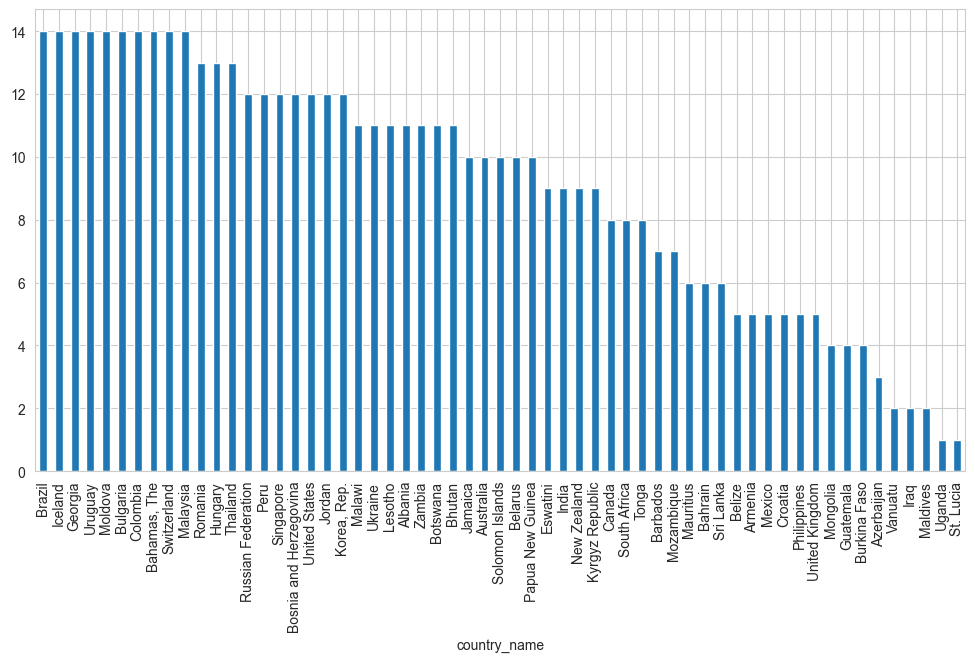

In [77]:
data['country_name'].value_counts().plot(kind='bar',figsize=(12,6))

- ilosc obserwacji panstw sie dosyc mocno rozni, pojawia sie pytanie czy jest sens wszystkie panstwa brac pod uwage, czy jakies kraje nie beda przez brak danych wypadac lepiej od innych , dodatkowo brak danych nie wplywa bezposrednio w clusteringu i porzadkowaniu liniowym na wyniki innych krajow. Kolejne pytanie sie pojawia jak heurstycznie przyjac "dobrą/poprawna" ilosc panstw ktore chociaż troche nie będą zniekształać obrazu badania, dodatkowo usuwanie krajow bedzie redukowalo informajce którą bedzie mogli wyciąganąc z tego datasetu. Zatem zostawimy wszytkie kraje.    

# EDA 

In [78]:
display(data)

,country_name,year,Inflation_CPI,Unemployment_Rate,Interest_Rate_perc,GDP_Growth_perc,Government_Revenue_perc_of_gdp,Public_Debt_perc_of_gdp,continent,year2
49,Albania,2011-01-01,3.43,13.48,9.89,2.55,23.90,69.64,Europe,2011
50,Albania,2012-01-01,2.03,13.38,9.74,1.42,23.05,63.67,Europe,2012
51,Albania,2013-01-01,1.94,15.87,9.51,1.00,22.30,70.58,Europe,2013
52,Albania,2014-01-01,1.63,18.06,6.32,1.77,24.53,73.32,Europe,2014
53,Albania,2015-01-01,3.50,17.19,7.27,2.22,24.74,79.86,Europe,2015
...,...,...,...,...,...,...,...,...,...,...
3446,Zambia,2016-01-01,17.87,5.24,1.69,3.76,18.13,46.43,Africa,2016
3447,Zambia,2017-01-01,6.58,4.53,2.09,3.53,16.85,52.28,Africa,2017
3448,Zambia,2018-01-01,7.49,5.03,2.22,4.03,19.41,59.71,Africa,2018
3449,Zambia,2019-01-01,9.15,5.54,2.47,1.44,19.60,61.93,Africa,2019


- ze wzgledu na duza ilosc krajow zdecydowalimsy sie zrobic statystyki opisowe bazujac na kontynencie biorac 3 najwazniejze statystyki srednia mediana i wspolczynnik zmiennosci, zbyt duzy df bysmy otrzymali robiac go po krajach. Dzielac po kontynentach i tak dostajemy dosyc duzy df, ale nadal bardziej czytelny niz przy 51 krajach

In [79]:

data2 = data

num_cols = [c for c in data2.select_dtypes(include=['number']).columns if c not in ['year2']]

stats = data2.groupby('continent')[num_cols].agg(['mean', 'median','std'])

for col in num_cols:
    stats[(col, 'cv')] = (stats[(col, 'std')] / stats[(col, 'mean')]) * 100

display(stats.round(2).T)


continent                              Africa    Asia  Europe  North America  \
Inflation_CPI                  mean      7.16    3.72    5.34           3.12   
                               median    5.68    3.07    3.32           2.20   
                               std       5.82    3.15    8.41           2.59   
Unemployment_Rate              mean     13.55    6.45    7.81           8.26   
                               median   13.19    3.93    5.92           8.25   
                               std       8.99    5.37    5.51           3.37   
Interest_Rate_perc             mean      6.75    5.43    2.09           4.68   
                               median    6.05    4.55    2.83           3.86   
                               std       6.23    6.85    6.20           4.25   
GDP_Growth_perc                mean      3.08    4.31    2.12           1.28   
                               median    3.53    4.34    2.22           1.78   
                               std       3.53    3.86    3.47           4.38   
Government_Revenue_perc_of_gdp mean     25.16   21.44   30.45          19.60   
                               median   24.57   20.93   30.50          18.69   
                               std       9.49    5.88    6.21           4.73   
Public_Debt_perc_of_gdp        mean     40.60   58.86   53.58          76.82   
                               median   34.29   51.89   42.90          71.34   
                               std      23.29   25.24   36.16          33.15   
Inflation_CPI                  cv       81.28   84.67  157.50          82.92   
Unemployment_Rate              cv       66.37   83.17   70.57          40.77   
Interest_Rate_perc             cv       92.32  126.19  296.38          90.98   
GDP_Growth_perc                cv      114.87   89.71  163.61         341.90   
Government_Revenue_perc_of_gdp cv       37.72   27.42   20.40          24.13   
Public_Debt_perc_of_gdp        cv       57.35   42.89   67.49          43.15   

continent                              Oceania  South America  
Inflation_CPI                  mean       2.93           5.49  
                               median     2.45           4.79  
                               std        2.17           2.72  
Unemployment_Rate              mean       3.42           8.15  
                               median     2.69           8.35  
                               std        1.98           3.09  
Interest_Rate_perc             mean       4.74          13.16  
                               median     5.08           8.90  
                               std        3.96          11.32  
GDP_Growth_perc                mean       2.75           2.78  
                               median     2.60           3.01  
                               std        2.70           4.16  
Government_Revenue_perc_of_gdp mean      24.71          25.80  
                               median    24.59          26.84  
                               std        6.09           4.05  
Public_Debt_perc_of_gdp        mean      38.25          55.23  
                               median    41.72          58.28  
                               std       18.41          21.63  
Inflation_CPI                  cv        74.26          49.57  
Unemployment_Rate              cv        57.94          37.87  
Interest_Rate_perc             cv        83.67          85.98  
GDP_Growth_perc                cv        98.03         149.28  
Government_Revenue_perc_of_gdp cv        24.67          15.71  
Public_Debt_perc_of_gdp        cv        48.14          39.16

# wnioski

### 1. Inflacja CPI 
Średnia inflacja byla najwyzsza w **Afryce (7.16%)** i **Azji (5.82%)**, najnizsza w **Oceanii (2.93%)** i **Europie (3.72%)**.  
Najwieksza srednia inflacja wystepowala w **Ameryce Polnocnej (157%)** i **Europie (84%)**.


### 2. Stopa bezrobocia 
Najwyzsza stope bezrobocia odnotowano w **Afryce (13.55%)** i **Azji (13.19%)**, a najnizszaa w **Oceanii (3.42%)** i **Ameryce Polnocnej (7.81%)**.  
Zmienność byla najwyzsza w **Azji (83%)** i **Europie (70%)**, najnizsza w **Oceanii (41%)**.


### 3. Stopa procentowa 
Najwyzsze średnie stopy procentowe wystepowaly w **ameryce poludniowej (13.16%)** i **afryce (6.75%)**, a najnizsze w **ameryce polnocnej (2.09%)** i **europie (5.43%)**.  
Zmienność byla szczegolnie wysoka w **ameryce polnocnej (296%)** oraz **azji (126%)**.


### 4. Wzrost PKB
Najwyzsze tempo wzrostu gospodarczego odnotowano w **Azji (4.31%)** i **Afryce (3.08%)**, najnizsze w **Ameryce Polnocnej (2.12%)** i **Oceanii (2.75%)**.  
Najwieksza zmienność jest w **Oceanii (342%)** oraz **Ameryce Polnocnej (164%)**.


### 5. Dochody sektora rzadowego (% PKB)
Najwyzszy udzial dochodow rzadowych w PKB wystepowal w **Ameryce Polnocnej (30.45%)** i **Afryce (25.16%)**, a najnizszy w **Europie (21.44%)**.  
Zmienność byla stosunkowo niska – **Afryka (37.7%)**, **Azja (27.4%)**, **Europa (20.4%)**.


### 6. Dlug publiczny (% PKB) 
Najwyzszy średni poziom dlugu publicznego wystepowal w **azji (58.86%)** i **ameryce polnocnej (53.58%)**, a najnizszy w **afryce (40.6%)**.  
Najwieksze zroznicowanie poziomu zadluzenia obserwuje sie w **europie (67%)** i **ameryce polnocnej (54%)**.


##  Podsumowanie

- **Azja i Afryka** – wysoki wzrost PKB (odpowiednio 4.3% i 3.1%), ale rowniez wyzsza inflacja i bezrobocie – charakterystyczne dla emerging markets.  
- **Europa** – umiarkowany wzrost gospodarczy (ok. 3.9%) i umiarkowana inflacja (3.7%), lecz duza zmienność wynikajaca z kryzysow energetycznych i wojny.  
- **Ameryka Polnocna** – niskie tempo wzrostu (2.1%), bardzo zmienne stopy procentowe i inflacja.  
- **Oceania** – stabilny rynek pracy (bezrobocie 3.4%) i umiarkowane wskaźniki fiskalne.  
- **Ameryka Poludniowa** – najwyzsze stopy procentowe (13.2%) i wysoka inflacja (5.5%), co potwierdza problemy ze stabilnościa fiskalna tamtejszych krajow np Argentyna.  





In [80]:
data['country_name'].unique()   

array(['Albania', 'Armenia', 'Australia', 'Azerbaijan', 'Burkina Faso',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Brazil', 'Barbados', 'Bhutan', 'Botswana',
       'Canada', 'Switzerland', 'Colombia', 'United Kingdom', 'Georgia',
       'Guatemala', 'Croatia', 'Hungary', 'India', 'Iraq', 'Iceland',
       'Jamaica', 'Jordan', 'Kyrgyz Republic', 'Korea, Rep.', 'St. Lucia',
       'Sri Lanka', 'Lesotho', 'Moldova', 'Maldives', 'Mexico',
       'Mongolia', 'Mozambique', 'Mauritius', 'Malawi', 'Malaysia',
       'New Zealand', 'Peru', 'Philippines', 'Papua New Guinea',
       'Romania', 'Russian Federation', 'Singapore', 'Solomon Islands',
       'Eswatini', 'Thailand', 'Tonga', 'Uganda', 'Ukraine', 'Uruguay',
       'United States', 'Vanuatu', 'South Africa', 'Zambia'], dtype=object)

In [81]:
data['country_name'].nunique()   

59

- 59 krajow duzo danych liczbowych podczas eda skupimy sie na wykresach rozkalow / wizualizacji szeregow czasowych / box plotach

In [82]:

data['continent'].value_counts(normalize=True).round(2)


continent
Europe           0.28
Asia             0.26
Africa           0.15
North America    0.12
South America    0.10
Oceania          0.09
Name: proportion, dtype: float64

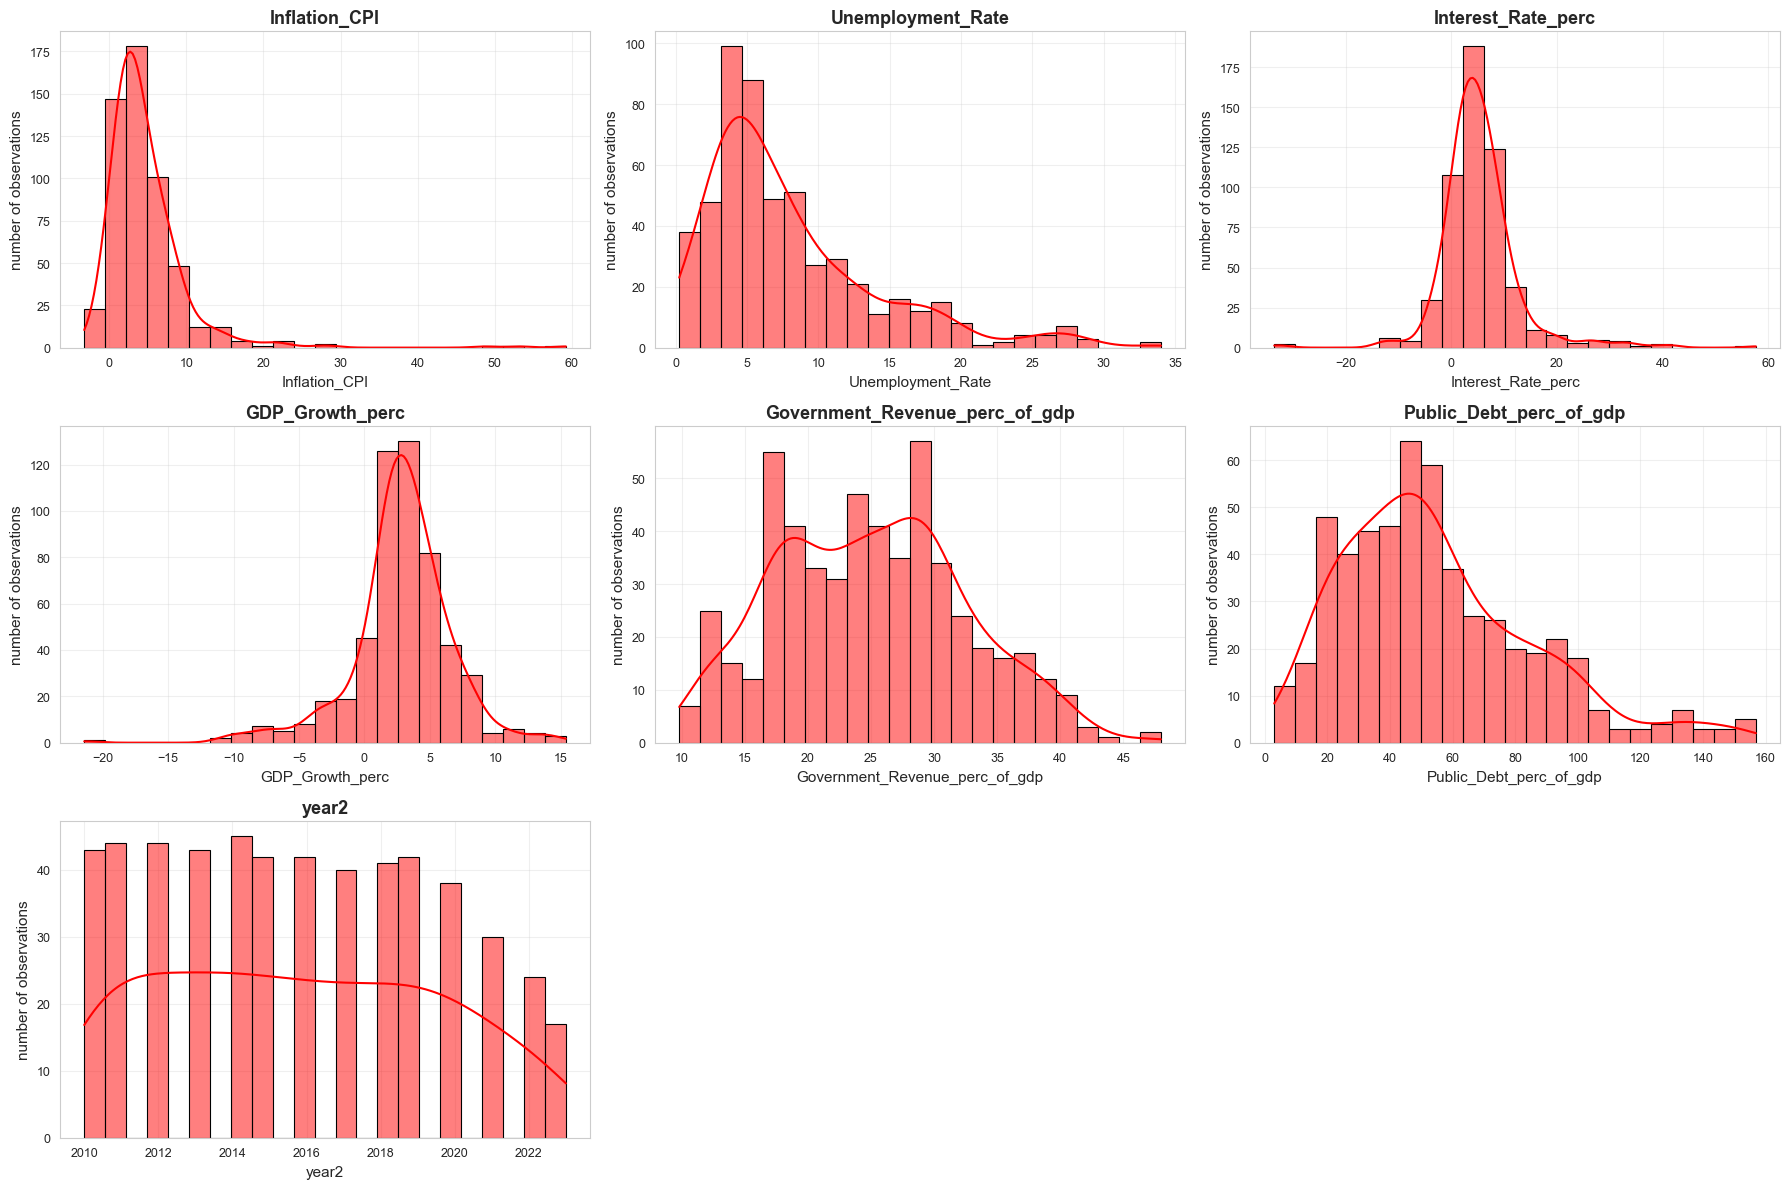

In [83]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
sns.set_style("whitegrid")

num_cols = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(18,12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=int(np.sqrt(len(data))), color='red', edgecolor='black', linewidth=0.8)
    plt.title(f"{col}", fontsize=13, fontweight='bold')
    plt.xlabel(f"{col}", fontsize=11)
    plt.ylabel("number of observations", fontsize=11)
    plt.tick_params(axis='x', labelsize=9, rotation=0)
    plt.tick_params(axis='y', labelsize=9)
    plt.grid(alpha=0.3)
    plt.tight_layout()

plt.show()



## 1. Inflacja  
Rozklad inflacji jest silnie prawoskośny — wiekszość krajow notuje wartości w zakresie od 0 do 10%, z najwyzszq czestotliwościq okolo 2–4%.  
Pojedyncze przypadki przekraczajqce 20–50% wskazujq na epizody hiperinflacji w niektorych gospodarkach rozwijajqcych sie.  


## 2. Stopa bezrobocia 
Rozklad stopy bezrobocia rowniez jest prawoskośny. Najwiecej krajow znajduje sie w przedziale 3–10%, natomiast obserwacje powyzej 20–25% dotyczq krajow z chronicznym bezrobociem.  
Zjawisko to dotyczy glownie państw afrykańskich i poludniowoamerykańskich.  


## 3. Stopa procentowa  
Rozklad stop procentowych przypomina ten dla inflacji – jest prawoskośny, z koncentracja w przedziale 0–10%.  
Wystepuja rowniez wartości ujemne (np. w krajach strefy euro i Japonii), a nieliczne obserwacje powyzej 40% pochodzq z krajow o niestabilnej polityce monetarnej.  
Świadczy to o raczej wiadomych duzych roznicach miedzy gospodarkami emerging i developed markets.


## 4. Wzrost PKB  
Rozklad wzrostu PKB jest najbardziej zblizony do normalnego.  
Wiekszość obserwacji skupia sie wokol wartości od 0 do 4%, co wskazuje na umiarkowane tempo wzrostu gospodarczego.  
Obserwacje ujemne (np. ponizej −10%) odzwierciedlajq recesje podczas roznorakich kryzysow, takich jak pandemia COVID-19.


## 5. Dochody sektora rzqdowego  
Rozklad dochodow rzqdowych jest bardziej rownomierny, z lekkim wskazaniem na dwa skupienia – okolo 20% oraz 30% PKB.  
Prawdopodobnie odzwierciedla to roznice miedzy krajami developed (wyzsze dochody) a emerging (nizsze).  


## 6. Dlug publiczny  
Rozklad dlugu publicznego jest prawoskośny – wiekszość krajow utrzymuje zadluzenie w zakresie 40–80% PKB.  
Wystepuja jednak pojedyncze wartości przekraczajqce 100–150%, typowe dla krajow o duzym zadluzeniu (np. Japonia, Wlochy, Grecja).  


## 7. Rok  
Histogram pokazuje liczbe obserwacji w kolejnych latach.  
Widzimy wyraźny spadek liczby danych po 2020 roku, co moze wynikać z niepelnych obserwacji dla lat 2021–2025 lub z danych opartych na prognozach.

---

##  Podsumowanie
Wiekszość zmiennych, takich jak inflacja, bezrobocie, stopy procentowe i dlug publiczny, ma rozklad prawoskośny, co oznacza, ze wiekszość krajow charakteryzuje sie umiarkowanymi wartościami, a tylko nieliczne obserwacje sq ekstremalne.  
Wzrost PKB jest najbardziej symetryczny, co wskazuje na wzglednie zrownowazony rozwoj wiekszości gospodarek.  
Dochody sektora publicznego i dlug publiczny pokazuja roznice strukturalne miedzy krajami emerging a developed markets .  
Liczba obserwacji maleje w nowszych latach, co sugeruje obecność danych prognozowanych w końcowym okresie.




- po rozkladach mozna sprobowac sprawdzic czy dane maja rozkald normalny, jednakze mozna z gory zalozyc przez fat tails ze nie beda mialy rozkaldu normalnego zmienne Interest_Rate_perc i GDP_Growth_perc

In [84]:
pval ,val = shapiro(data['Interest_Rate_perc'])

val

2.846230076907784e-23

In [85]:
pval ,val = shapiro(data['GDP_Growth_perc'])

val

4.696467376678714e-15

- brak rozkladu normalnego

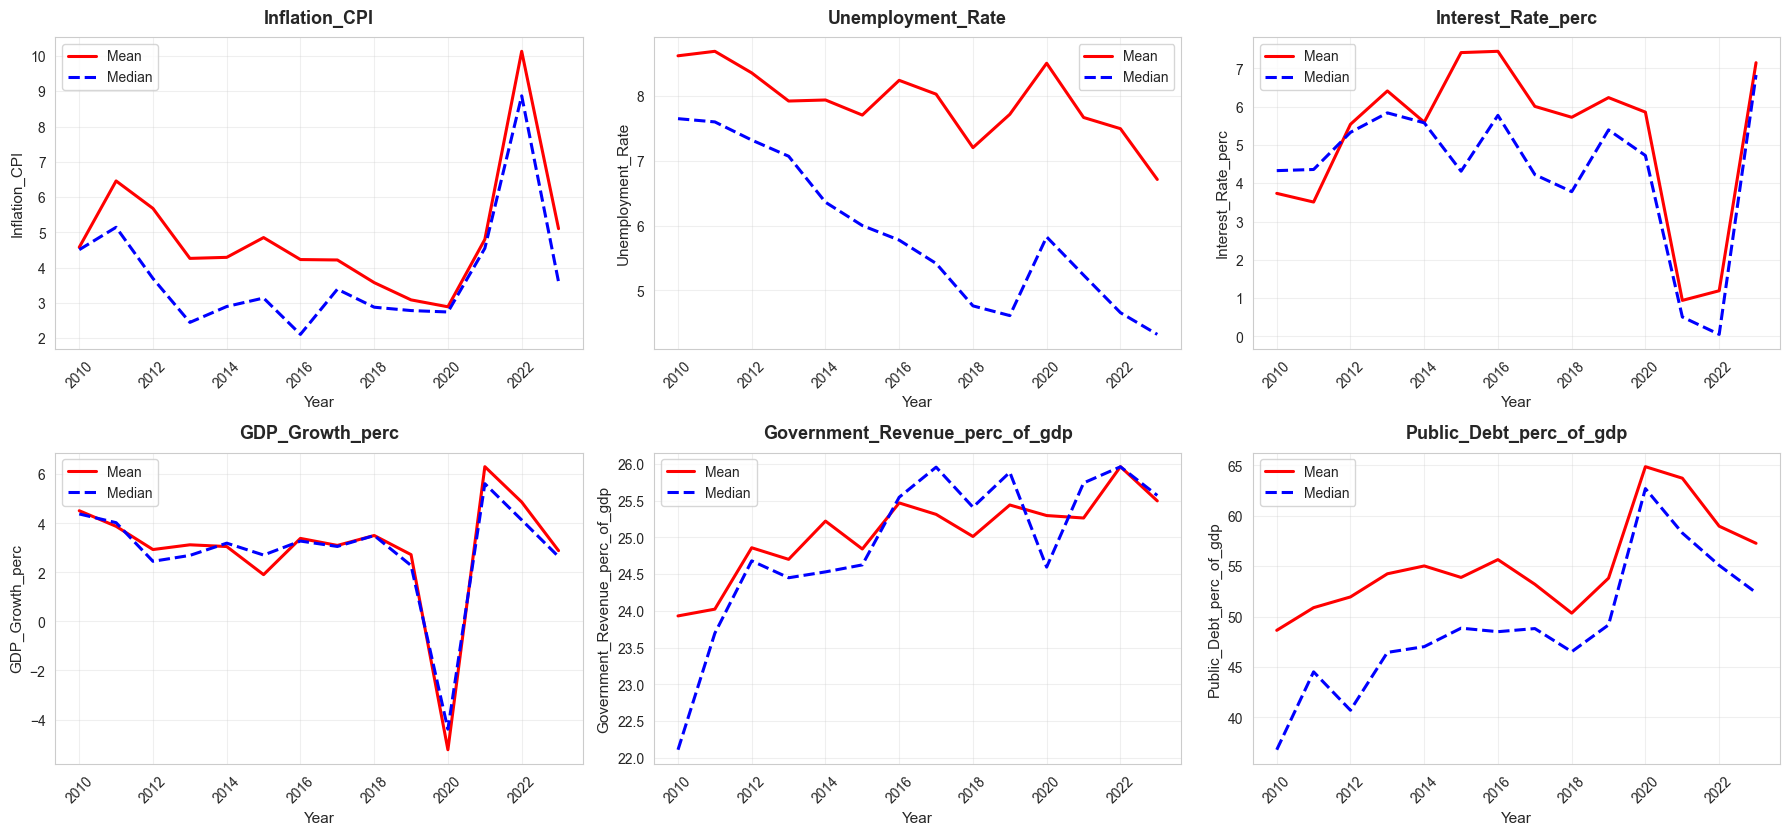

In [86]:

num_cols = [col for col in data.select_dtypes(include=[np.number]).columns if col != 'year2']

data_mean = data.groupby('year')[num_cols].mean().reset_index()
data_median = data.groupby('year')[num_cols].median().reset_index()

plt.figure(figsize=(18, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.lineplot(data=data_mean, x='year', y=col, color='red', linewidth=2.2, label='Mean')
    sns.lineplot(data=data_median, x='year', y=col, color='blue', linewidth=2.2, linestyle='--', label='Median')
    
    plt.title(f"{col}", fontsize=13, fontweight='bold', pad=10)
    plt.xlabel("Year", fontsize=11)
    plt.ylabel(col, fontsize=11)
    
    plt.tick_params(axis='x', labelsize=10, rotation=45)
    plt.tick_params(axis='y', labelsize=10)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()



## 1. Inflacja 
od 2010 roku inflacja utrzymywała sie na poziomie umiarkowanym lekko powyzej celu banków centralnych około 3–4%, z niewielkimi wahaniami.  
W latach 21–22 nastapił gwałtowny wzrost zarówno średniej, jak i mediany, co odzwierciedla globalny szok inflacyjny po pandemii COVID-19 i kryzys energetyczny.  
Roznica miedzy srednia a mediana zwieksza sie po 2020 roku, co wskazuje na rosnace zroznicowanie miedzy krajami co sugeruje na inne podejscia do walki z inflacja i do stymulacji gospodarki po covidzie.

## 2. Stopa bezrobocia
W latach 2010–2023 widac wyraźny trend spadkowy.  
Mediana spadała szybciej niz srednia, co sugeruje, ze w wiekszości krajów sytuacja na rynku pracy poprawiała sie bardziej równomiernie niz w krajach z najwyzszym bezrobociem.

## 3. Stopa procentowa 
W latach 2010–2019 stopy procentowe pozostawały umiarkowane, z niewielkimi wahaniami w przedziale 4–7%.  
W latach 2020–2021 widoczny jest spadek do bardzo niskich poziomów w wyniku luźnej polityki fiskalnej i QE.  
Od 2022 roku nastepuje gwałtowny wzrost stóp, bedacy reakcja banków centralnych na rosnaca przez wojne inflacje.

## 4. Wzrost PKB 
Wzrost gospodarczy był stosunkowo stabilny do 2019 roku, utrzymujac sie na poziomie około 3–4%.  
W 2020 roku nastapił silny spadek (pandemia), a w 2021–2022 gwałtowny rebounce powyzej 5%.  
Po 2022 roku dynamika wzrostu ponownie sie stabilizuje.  
Zbiezność średniej i mediany sugeruje, ze wiekszość krajów podlegała podobnym cyklom koniunkturalnym.

## 5. Dochody sektora rzadowego (% PKB)
Dochody sektora publicznego stopniowo rosły z około 22% PKB w 2010 roku do około 26% w 2023 roku.  
W latach 2015–2020 wystepuja lekkie wahania, ale trend  jest wzrostowy.  
Średnia i mediana pozostaja blisko siebie, co wskazuje na stabilność fiskalna i niewielkie róznice miedzy krajami.

## 6. Dług publiczny (% PKB)
Dług publiczny wykazywał trend rosnacy w latach 2010–2020, osiagajac szczyt w czasie pandemii COVID-19 (około 65% PKB).  
Po 2021 roku widoczny jest spadek, co moze wynikać z odbudowy gospodarczej i wzrostu nominalnego PKB.  
Mediana długu pozostaje nizsza od średniej, co oznacza, ze kilka silnie zadłuzonych krajów (np. Japonia, Włochy) zawyza wartość przecietna.

---

##  Podsumowanie
W latach 2010–2023 światowa gospodarka przeszła przez trzy wyraźne fazy:  
1. **Stabilny wzrost i umiarkowana inflacja (2010–2019)**,  
2. **Załamanie i recesja w 2020 roku (pandemia COVID-19)**,  
3. **Odbicie i szok inflacyjny po 2021 roku**.  

- Dane wskazuja na poprawe sytuacji na rynku pracy i wzrost stabilności fiskalnej, przy jednoczesnym wzroście zadłuzenia publicznego i inflacji po 2020 roku.  
Średnie i mediany potwierdzaja, ze mimo globalnych szoków gospodarczych, wiekszość krajów podazala podobnym cyklem makroekonomicznym.





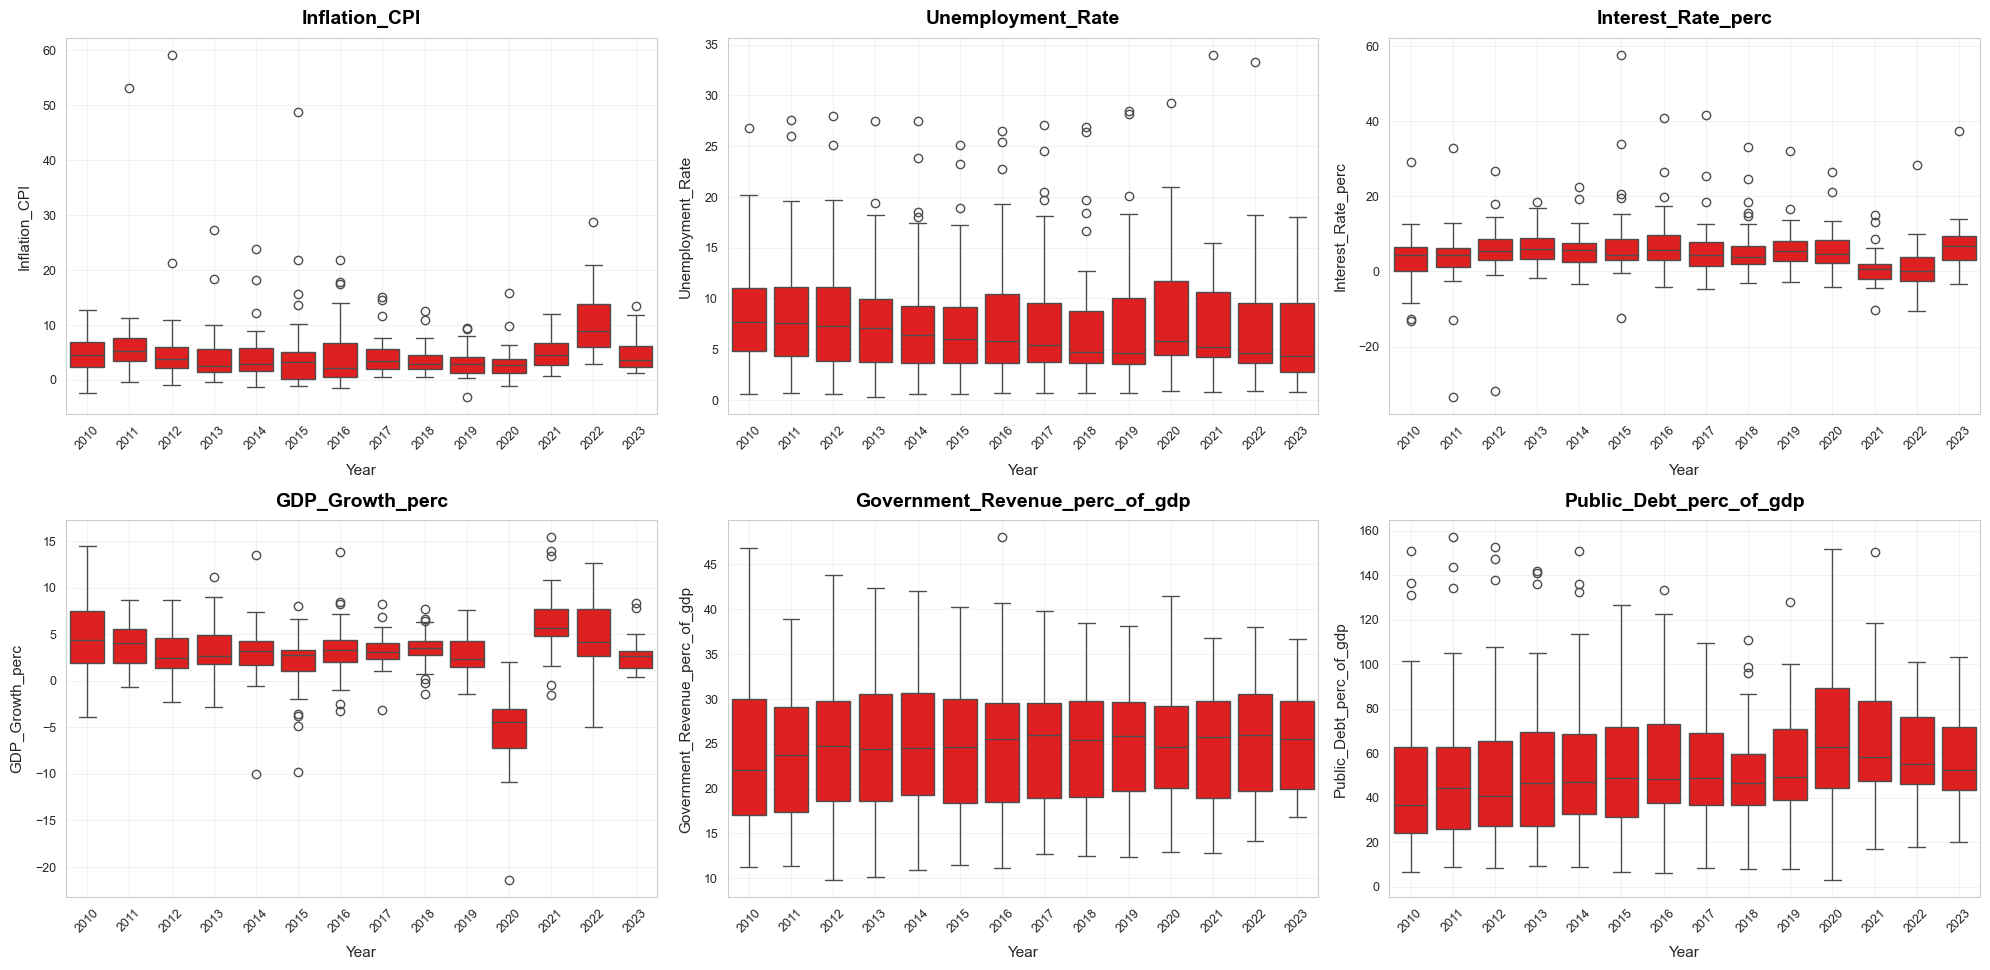

In [87]:

plt.figure(figsize=(20, 14))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, x='year2', y=col, color='red')

    plt.title(f"{col}", fontsize=14, fontweight='bold', pad=10, color='black')
    plt.xlabel("Year", fontsize=11, labelpad=8)
    plt.ylabel(col, fontsize=11, labelpad=8)
    plt.tick_params(axis='x', labelsize=9, rotation=45)
    plt.tick_params(axis='y', labelsize=9)
    plt.grid(alpha=0.25)

    plt.tight_layout()

plt.show()


In [88]:
data.query(' Inflation_CPI > 40 ')


,country_name,year,Inflation_CPI,Unemployment_Rate,Interest_Rate_perc,GDP_Growth_perc,Government_Revenue_perc_of_gdp,Public_Debt_perc_of_gdp,continent,year2
353,Belarus,2011-01-01,53.23,6.02,-33.49,5.55,28.06,39.42,Europe,2011
354,Belarus,2012-01-01,59.22,5.95,-31.81,1.71,29.04,24.43,Europe,2012
3221,Ukraine,2015-01-01,48.70,9.14,-12.28,-9.77,35.76,70.26,Europe,2015


In [89]:
data.query(' GDP_Growth_perc < -8 ')


,country_name,year,Inflation_CPI,Unemployment_Rate,Interest_Rate_perc,GDP_Growth_perc,Government_Revenue_perc_of_gdp,Public_Debt_perc_of_gdp,continent,year2
330,"Bahamas, The",2020-01-01,0.04,12.03,7.07,-21.42,20.96,82.26,North America,2020
474,Bhutan,2020-01-01,5.63,5.03,8.28,-10.22,20.03,111.01,Asia,2020
490,Botswana,2020-01-01,1.89,21.02,1.31,-8.73,28.77,19.62,Africa,2020
1546,Jamaica,2020-01-01,5.23,6.50,8.31,-9.92,29.25,106.28,North America,2020
1834,Lesotho,2020-01-01,4.98,18.40,2.28,-8.16,41.39,2.99,Africa,2020
1962,Moldova,2020-01-01,3.77,1.19,2.47,-8.28,28.73,33.96,Europe,2020
2010,Mexico,2020-01-01,3.40,4.44,1.65,-8.35,18.64,45.84,North America,2020
2442,Peru,2020-01-01,2.00,7.18,8.89,-10.93,18.05,34.76,South America,2020
3220,Ukraine,2014-01-01,12.07,9.27,1.57,-10.08,33.68,63.67,Europe,2014
3221,Ukraine,2015-01-01,48.70,9.14,-12.28,-9.77,35.76,70.26,Europe,2015


- Ukraina jest doscy zrozumiala, aneksja krymu przez rosje  skutukuje w wysokiej infalcji i niskim wzroscie PKB, i wiadc inne pomniejsze kraje ktore nie sa uznawane za stabilne np lesotho moldawia bhutan etc ( co ciekawe wszystkie one oprocz ukrainy maja w 2020 roku tak ogromny spadke PKB , zatem biedne zdeycdowanie najmocniej odczuly padnemie covid, lub tez najbardziej ucierpialy poprzez to ze ich gospodrka opiera sie bardzo mocno na turystyce)

In [90]:
data.query(' Interest_Rate_perc < -10 ')


,country_name,year,Inflation_CPI,Unemployment_Rate,Interest_Rate_perc,GDP_Growth_perc,Government_Revenue_perc_of_gdp,Public_Debt_perc_of_gdp,continent,year2
300,Bulgaria,2022-01-01,15.33,4.27,-10.50,4.04,36.54,30.15,Europe,2022
353,Belarus,2011-01-01,53.23,6.02,-33.49,5.55,28.06,39.42,Europe,2011
354,Belarus,2012-01-01,59.22,5.95,-31.81,1.71,29.04,24.43,Europe,2012
1808,Sri Lanka,2010-01-01,6.22,4.78,-13.17,8.02,12.33,69.25,Asia,2010
1952,Moldova,2010-01-01,7.48,2.94,-12.71,7.10,26.33,21.93,Europe,2010
2641,Russian Federation,2011-01-01,8.44,6.57,-12.86,4.30,29.15,8.64,Europe,2011
2651,Russian Federation,2021-01-01,6.69,4.75,-10.24,5.61,26.37,20.87,Europe,2021
3221,Ukraine,2015-01-01,48.70,9.14,-12.28,-9.77,35.76,70.26,Europe,2015


- absolutnym rekordzista jest bialorus majac stopy procentowe (realne) ujemne o wartosci az 30% co przy tak wysokiej inflacji ma sens. Swoja droga wynika to z tego ze bialorus sztucznie utrzymywala wartosc bialoruskiego rubla wzgledem euro i dolara a potem gdy rezerwy banku centralnego sie wyczerpaly zdewaluowano rubla o 50%


## 1. Inflacja 
Rozklad inflacji pozostaje stosunkowo stabilny w latach 2010–2019, z mediana w przedziale 2–4%.  
Od 2021 roku obserwuje sie wzrost mediany i IQR w boxplocie, co odzwierciedla globalny wzrost inflacji po pandemii COVID-19 i oczywisce glowny winowajca czyli wojna na ukrainie.  
Wartości odstajace w 2011, 2012 i 2015 roku wskazuja na epizody hiperinflacji w niektórych krajach.

## 2. Stopa bezrobocia 
W latach 2010–2019 widoczny jest stopniowy spadek mediany stopy bezrobocia oraz zaweżenie IQR, co świadczy o poprawie sytuacji na rynku pracy w wiekszości krajów.  
W okresie pandemii (2020–2021) pojawia sie niewielki wzrost mediany i wieksza liczba outlierow a także rekordowe poziomy po 34/35 % 

## 3. Stopa procentowa 
Rozklad stóp procentowych jest szeroki i niestabilny przez caly okres analizy.  
Mediana utrzymuje sie w okolicach 5%, lecz widać liczne wartości odstajace, w tym zarówno bardzo ujemne ~-30%, jak i bardzo wysokie (>40%), typowe dla krajów z niestabilna polityka pienieżna.  
Z 2020 do 2021 roku widać spadek co mowi luznej polityce fiskalnej podczas covidu i spadku mediany stop procentowych.
Po 2021 roku pojawia sie wzrost mediany, odzwierciedlajacy globalne zacieśnienie polityki monetarnej spowodowany inflacja po luzowaniu fiskalnym podczas pandemii i wojna na ukrainie.

## 4. Wzrost PKB
Wzrost PKB jest relatywnie stabilny do 2019 roku, z mediana w przedziale 2–4%.  
W 2020 roku nastepuje gwaltowne zalamanie spadek mediany i rozszerzenie IQR, odpowiadajace recesji podczas pandemii i zdecydowanej wiekszosci krajów .  
W kolejnych latach widać gwałtowne odbicie i stabilizacje wzrostu pkb.

## 5. Dochody sektora rzadowego (% PKB)
Rozklad jest stosunkowo stabilny w calym okresie — mediana oscyluje wokól 25% PKB.  
W 2020 roku obserwuje sie niewielkie zwiekszenie zmienności, prawdopodobnie zwiazane z dzialaniami fiskalnymi w czasie pandemii.  
Brak dużej liczby wartości odstajacych wskazuje na trwalość i przewidywalność polityki budżetowej.

## 6. Dlug publiczny (% PKB)
W latach 2010–2019 dlug publiczny stopniowo rośnie, z mediana przesuwajaca sie z ok. 40% do 60% PKB.  
W 2020 roku obserwuje sie gwaltowny wzrost wartości oraz rozszerzenie iqr i ponownie  efekt zwiekszonych wydatków rzadowych w reakcji na pandemie.  
Po 2021 roku zmienność dlugu pozostaje wysoka, co odzwierciedla różne podejścia  poszczególnych krajów do pocovidowej gospodarki jak i to ze nie każdy kraj był tak samo dotknięty wojna na ukrainie.

##  Podsumowanie

- **Inflacja i stopy procentowe** staly sie znacznie bardziej zmienne po 2020 roku.  
- **Bezrobocie** wykazuje tendencje spadkowa w dlugim okresie, z krótkim wzrostem w czasie pandemii.  
- **Wzrost PKB** silnie reaguje na globalne szoki (2020 – recesja, 2021 – odbicie).  
- **Dlug publiczny** znaczaco wzrósl w 2020 roku, a jego rozklad pozostal szeroki.  
- **Dochody sektora rzadowego** utrzymuja sie na stabilnym poziomie, co potwierdza relatywnie stala polityke fiskalna.

Wykresy te potwierdzaja, że lata 2020–2022 stanowily punkt zwrotny w globalnych trendach makroekonomicznych, charakteryzujacy sie zwiekszona zmiennościa wiekszości wskaźników.




## podsumowanie EDA


W latach 2010–2023 światowa gospodarka przeszla trzy wyraźne fazy:  
1. **Stabilny wzrost i umiarkowana inflacja (2010–2019)**,  
2. **Zalamanie gospodarcze w 2020 roku (pandemia COVID-19)**,  
3. **Odbicie i szok inflacyjny po 2021 roku (wojna w Ukrainie, zaburzenia podaży energii)**.  

- **Inflacja i stopy procentowe** staly sie znacznie bardziej zmienne po 2020 roku.  
- **Bezrobocie** utrzymuje dlugoterminowy trend spadkowy z chwilowym wzrostem podczas pandemii.  
- **Wzrost PKB** silnie reaguje na globalne szoki, od recesji do szybkiego odbicia.  
- **Dlug publiczny** znaczaco wzrósl w 2020 roku i pozostal zróżnicowany w zależności od polityki fiskalnej krajów.  
- **Dochody sektora rzadowego** pozostaly stabilne.

Lata 2020–2022 stanowia punkt zwrotny w globalnych trendach makroekonomicznych, charakteryzujacy sie wzrostem zmienności wiekszości wskaźników oraz odmiennymi strategiami reakcji gospodarek na kryzysy.


- Z zwiazku z tym ze przedstawianie danych w takiej formie nie ma swoje slabosci np ilosc danych albo braki danych dla poszczegolnych panstw etc. Stworzylismy ploty-em interaktywny dashboard ktorego mozna uzywac do stworzenia interesujacego nas wykresu, dzieki niemu mozna dokladniej zbadac interesujące nas kraje. 

## interaktywny dashboard

In [91]:
import plotly.graph_objects as go

df = data[data['country_name'] == "United States"].sort_values('year2')
x = df['year2']
y = df["Inflation_CPI"]

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers', name='Line', visible=True))
fig.add_trace(go.Bar(x=x, y=y, name='Bar', visible=False))

fig.update_layout(
    height=600, margin=dict(t=80), template="plotly_white"
)

country_buttons = [
    dict(label=cn, method="update",
         args=[{"x":[data.loc[data.country_name==cn, 'year2']]*3 + [data.loc[data.country_name==cn, 'Inflation_CPI']],
                "y":[data.loc[data.country_name==cn, 'Inflation_CPI']]*3 + [None]},
              ])
    for cn in sorted(data['country_name'].unique())
]

metric_buttons = [dict(label=m, method="update",args=[{"x":[x, x, x, y],"y":[data.loc[data.country_name=='United States', m]]*3 + [None]},])
    for m in [c for c in data.select_dtypes(include=['number']).columns if c != 'year2']
]

chart_buttons = [
    dict(label="line",  args=[{"visible":[True, False, False, False]}],method="update"),
    dict(label="bar", method="update", args=[{"visible":[False, True, False, False]}]),
]

fig.update_layout(
    updatemenus=[
        dict(buttons=country_buttons, direction="down", y=1.05, x=0.0 ),
        dict(buttons=metric_buttons,  direction="down", x=0.35, y=1.05),
        dict(buttons=chart_buttons,   direction="down", y=1.04,x=0.70),
    ]
)

fig.show()


# porzadkowanie liniowe

## Metoda standaryzowanych sum  

In [92]:
df = data.copy()

features = [
    "Inflation_CPI",
    "Unemployment_Rate",
    "Interest_Rate_perc",
    "GDP_Growth_perc",
    "Public_Debt_perc_of_gdp",
    "Government_Revenue_perc_of_gdp"
]

country_means = df.groupby("country_name")[features].mean().round(2)


In [93]:
country_means =country_means.reset_index()

country_means





,country_name,Inflation_CPI,Unemployment_Rate,Interest_Rate_perc,GDP_Growth_perc,Public_Debt_perc_of_gdp,Government_Revenue_perc_of_gdp
0,Albania,1.94,14.00,6.50,2.53,74.32,24.29
1,Armenia,4.09,15.71,7.61,5.42,53.66,23.78
2,Australia,2.12,5.51,4.22,2.60,44.67,24.44
3,Azerbaijan,5.05,6.30,9.53,2.12,15.13,39.46
4,"Bahamas, The",2.01,11.98,2.75,1.12,56.84,16.36
5,Bahrain,2.02,1.17,4.06,3.70,40.97,22.20
6,Barbados,3.36,10.75,5.45,-0.46,106.81,23.44
7,Belarus,19.85,5.61,-6.28,1.84,31.79,29.26
8,Belize,1.11,8.36,10.02,2.62,62.07,21.52
9,Bhutan,6.15,3.03,8.38,4.50,83.25,18.92


In [94]:
country_means

,country_name,Inflation_CPI,Unemployment_Rate,Interest_Rate_perc,GDP_Growth_perc,Public_Debt_perc_of_gdp,Government_Revenue_perc_of_gdp
0,Albania,1.94,14.00,6.50,2.53,74.32,24.29
1,Armenia,4.09,15.71,7.61,5.42,53.66,23.78
2,Australia,2.12,5.51,4.22,2.60,44.67,24.44
3,Azerbaijan,5.05,6.30,9.53,2.12,15.13,39.46
4,"Bahamas, The",2.01,11.98,2.75,1.12,56.84,16.36
5,Bahrain,2.02,1.17,4.06,3.70,40.97,22.20
6,Barbados,3.36,10.75,5.45,-0.46,106.81,23.44
7,Belarus,19.85,5.61,-6.28,1.84,31.79,29.26
8,Belize,1.11,8.36,10.02,2.62,62.07,21.52
9,Bhutan,6.15,3.03,8.38,4.50,83.25,18.92


- zakadamy tylko jedna nominante 30% bo tez im wiecej to moze faworyzowac panstwa ktora nie probuja znalazc balansu miedzy kapitalizm a socjalizm tylko faworyzuja np socjalizm mowiac ogolnei 

- stymulanty i destymulanty sa dosyc oczywiste choc moga faworyzowac mocno emerging markets 

In [95]:

df = country_means.copy()
id_col = "country_name"

stymulanty   = ["GDP_Growth_perc"]
destymulanty = ["Inflation_CPI", "Unemployment_Rate", "Interest_Rate_perc", "Public_Debt_perc_of_gdp"]
nominanty    = {"Government_Revenue_perc_of_gdp": 0.3}   # optimum = 0.3

feat_cols = [c for c in stymulanty + destymulanty + list(nominanty.keys()) if c in df.columns]
X = df[[id_col] + feat_cols].copy()


In [96]:
#  destymulanty: odwrócenie znaku 
for c in destymulanty:
    if c in X.columns:
        X[c] = -X[c]

# nominanty
for c, opt in nominanty.items():
    if c in X.columns:
        X[c] = -(X[c] - float(opt)).abs()

#  standaryzacja 
Z = X[feat_cols].copy()
for c in feat_cols:
    mu = Z[c].mean()
    sd = Z[c].std(ddof=1)
    if sd == 0 or np.isnan(sd):
        Z[c] = 0
    else:
        Z[c] = (Z[c] - mu) / sd

# wagi sa uniform
W = np.ones(len(feat_cols)) / len(feat_cols)

#unitaryzacja 
S = (Z.to_numpy(float) * W).sum(axis=1)

S_min, S_max = S.min(), S.max()

WSK = (S - S_min) / (S_max - S_min) if S_max > S_min else np.zeros_like(S)

ranking = pd.DataFrame({id_col: X[id_col].values, "WSK": WSK}).sort_values("WSK", ascending=False).reset_index(drop=True)

print(ranking)


              country_name       WSK
0              Philippines  1.000000
1                   Uganda  0.933910
2                Sri Lanka  0.923860
3             Burkina Faso  0.914425
4              Switzerland  0.911081
5                 Malaysia  0.897473
6                Guatemala  0.878985
7                    India  0.871458
8         Papua New Guinea  0.867826
9                 Thailand  0.867652
10                 Bahrain  0.862668
11                    Peru  0.783787
12         Solomon Islands  0.769897
13                  Canada  0.766011
14             Korea, Rep.  0.736081
15                Maldives  0.728019
16                   Tonga  0.710227
17               Australia  0.699247
18               Singapore  0.693618
19               Mauritius  0.685123
20                 Moldova  0.676487
21      Russian Federation  0.666016
22                  Zambia  0.654745
23                  Mexico  0.654396
24             New Zealand  0.652592
25           United States  0.613831
2

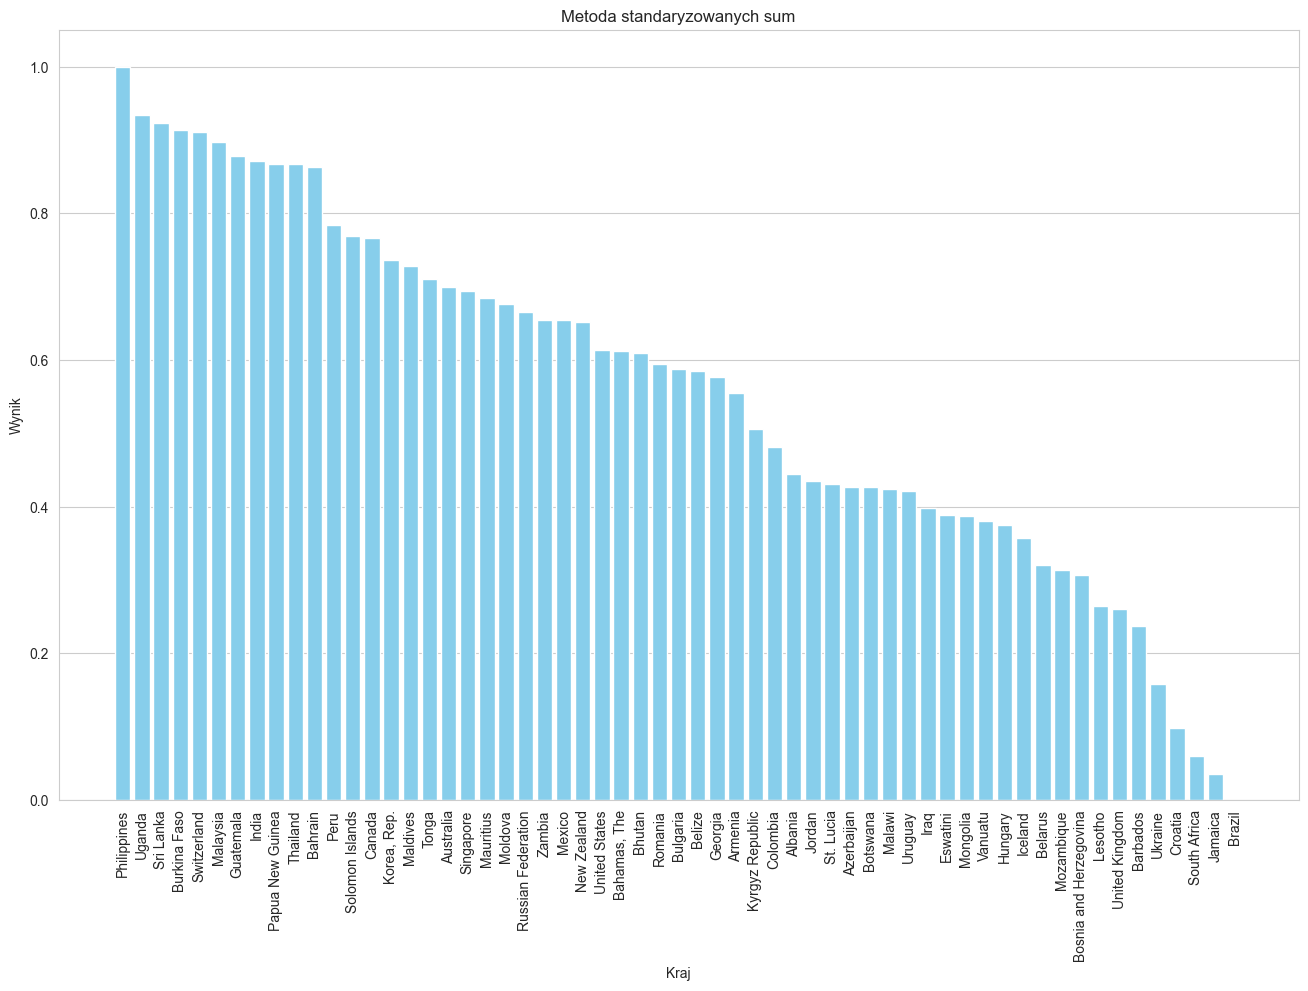

In [97]:
plt.figure(figsize=(16,10))
plt.bar(ranking['country_name'], ranking['WSK'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Kraj')
plt.ylabel('Wynik')
plt.title('Metoda standaryzowanych sum')
plt.grid(axis="x")
plt.show()


<Axes: ylabel='Frequency'>

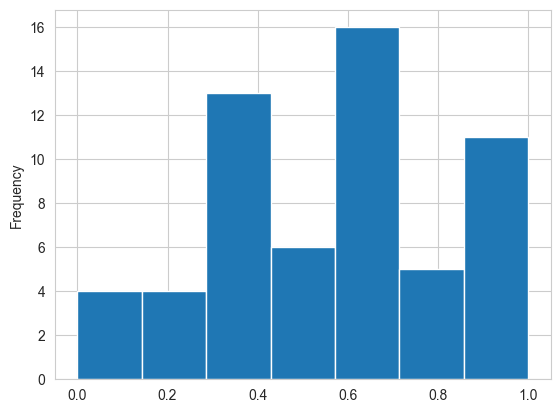

In [98]:
ranking['WSK'].plot(kind='hist',bins=int(np.sqrt(59)))

## podsumowanie 


-  Emerging Markets zdecydowanie zdominowały ranking. Na czele zestawienia znajdują się m.in. **Filipiny, Uganda, Sri Lanka, Burkina Faso** – gospodarki charakteryzujące się relatywnie wysoką dynamiką wzrostu PKB i umiarkowanymi wartościami destymulant.  

- Z kolei Developed market, takie jak **Wielka Brytania, Chorwacja, RPA czy Brazylia**, znalazły się w dolnej części rankingu, co może wynikać z wolniejszego wzrostu PKB i wyższych poziomów długu publicznego lub inflacji w analizowanym okresie.

- Moznabyloby zalozyc wiecej nominant np Inflation_CPI =2 % , czy np  stopa bezrobocia 3% jendakze nie kazdy bank centralny ma takie same np (FED  2% inflacji i NBP 2.5%) , mozna heursytycznie zalozyc jakies poziomy pyatnie czy bedzie to dobre odwzorowanie. Rowniez mozna wagi inaczje ulozyc np entropia , jednakze my przyjmujemy kazda zmienna ze jest rownie wazna i tylko jedna nominante. 



## Metoda sumy rang

- rowniez zakladamy wagi uniform

In [99]:
stymulanty   = ["GDP_Growth_perc"]
destymulanty = ["Inflation_CPI", "Unemployment_Rate", "Interest_Rate_perc", "Public_Debt_perc_of_gdp"]
nominanty    = {"Government_Revenue_perc_of_gdp": 0.35}   # optimum = 0.3


In [100]:


feat_cols = [c for c in stymulanty + destymulanty + list(nominanty.keys()) if c in df.columns]
X = df[[id_col] + feat_cols].copy()

#Zamiana na stymulanty
for c in destymulanty:
    if c in X.columns:
        X[c] = -X[c]

# nominanty
for c, Nj in nominanty.items():
    if c in X.columns:
        x = X[c]
        X[c] = np.where(x == Nj, 1.0,np.where(x > Nj, 1.0 / (x - Nj + 1.0),-1.0 / (Nj - x + 1.0)))

# rangi
rangi = pd.DataFrame(index=X.index)
for c in feat_cols:
    rangi[c] = X[c].rank(ascending=False, method="average")

# suma i srednia rang (z wagami)
m = len(feat_cols)
alpha = np.ones(m) / m                      
S = (rangi.to_numpy(float) * alpha).sum(axis=1)    

ranking = pd.DataFrame({id_col: X[id_col].values, "score_weighted": S}).sort_values("score_weighted", ascending=False).reset_index(drop=True)

print(ranking)


              country_name  score_weighted
0                  Jamaica       49.333333
1                   Brazil       47.500000
2                  Croatia       45.166667
3             South Africa       44.000000
4                  Ukraine       42.500000
5                 Barbados       41.500000
6                 Mongolia       41.416667
7                  Lesotho       39.750000
8                  Uruguay       39.333333
9               Mozambique       39.000000
10              Azerbaijan       37.333333
11                 Vanuatu       36.916667
12                Colombia       36.666667
13                  Jordan       36.500000
14          United Kingdom       35.750000
15               St. Lucia       35.500000
16         Kyrgyz Republic       35.166667
17                 Albania       35.083333
18                 Iceland       34.500000
19  Bosnia and Herzegovina       34.166667
20                 Hungary       33.666667
21                 Armenia       33.333333
22         

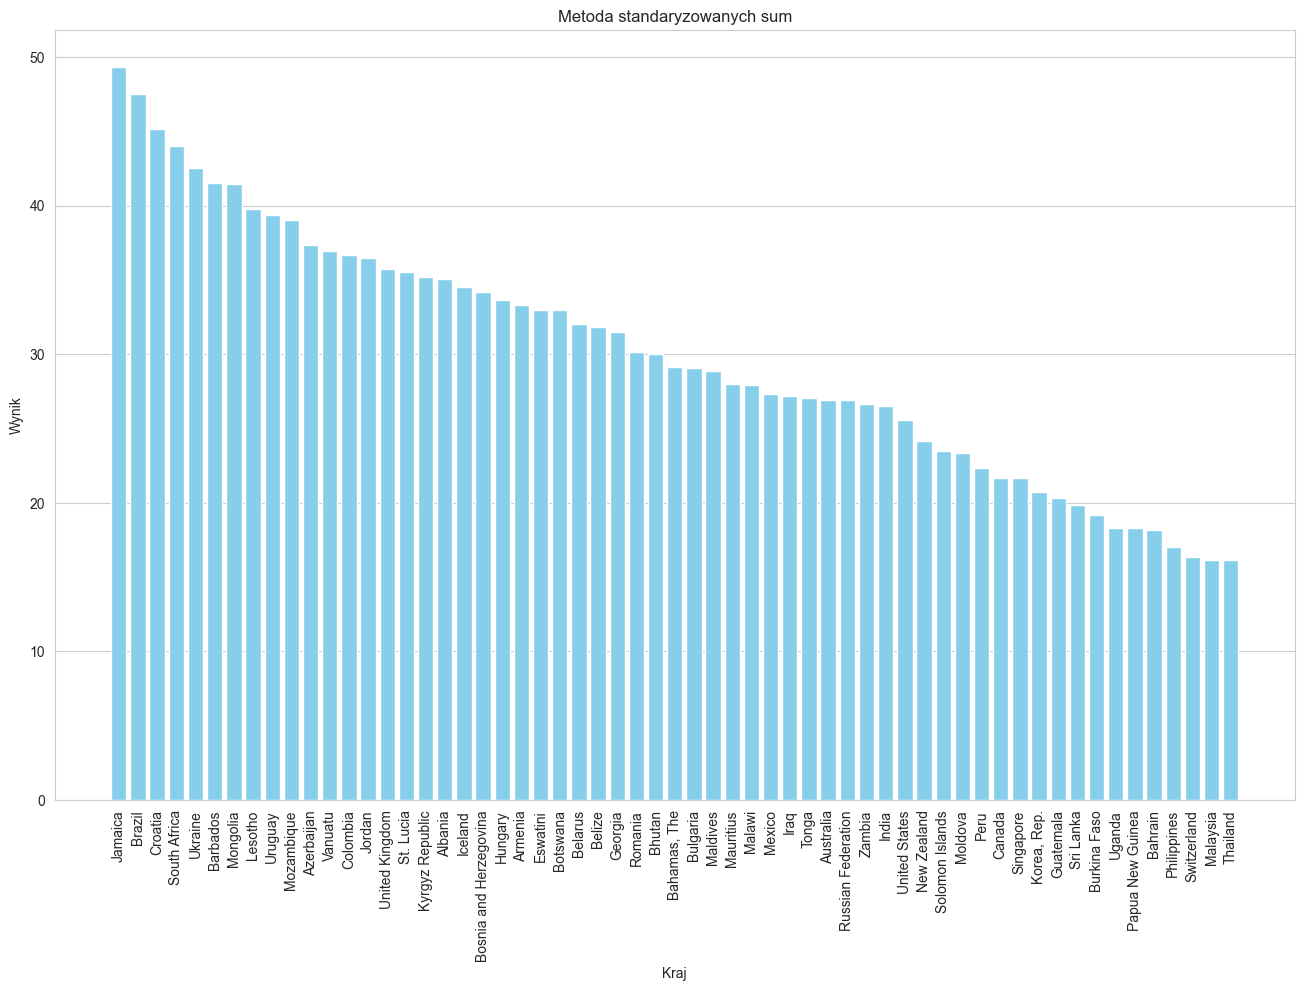

In [101]:
plt.figure(figsize=(16,10))
plt.bar(ranking['country_name'], ranking['score_weighted'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Kraj')
plt.ylabel('Wynik')
plt.title('Metoda standaryzowanych sum')
plt.grid(axis="x")
plt.show()


<Axes: ylabel='Frequency'>

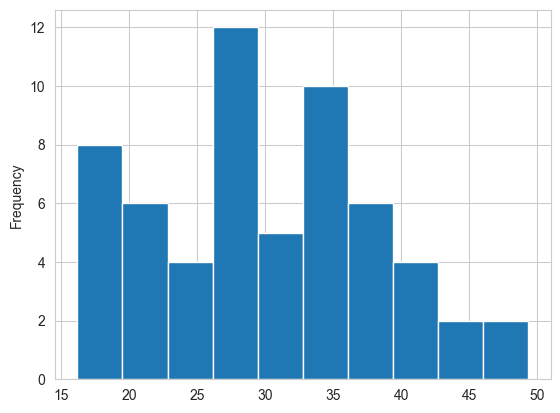

In [102]:
ranking['score_weighted'].plot(kind='hist')

## podsumowanie 


- W czolowce rankingu znalazly sie rownież takie kraje jak **Brazylia, Chorwacja, RPA i Jamajka**, co sugeruje, ze Emerging Markets podobnie co w poprzedniej metodzie wykazaly wieksza stabilnosc fiksalna jak i makroekonomiczna. 

- Co ciekawe  w poprzedniej metodzie 5 ostatnich krajow jest nagle na podium.  

- Dolna cześć rankingu zdominowala mieszanka azji emerging markets jak i developed markets np Szwajcaria takie jak **Malezja, Szwajcaria, Filipiny czy Tajlandia**, ktore charakteryzowaly sie niższa dynamika wzrostu PKB lub wyższym poziomem wybranych destymulant (np. inflacji lub zadlużenia publicznego).

- Zdecywaonie lepiej odwzorowywuje metoda standaryzowanych sum ranking panstwa o najlepiej stabilnosci fiskalnej jamajka raczej nie bedize najlepszym krajem ze wzlgedu np na dlug publiczny tak samo np Ukraina w top 5 toczaca wojne ma wieksza stabilnsoc niz US albo UK.


## metoda hellwiga

In [103]:
import numpy as np
import pandas as pd

def metoda_hellwiga(df, id_col, stymulanty, destymulanty, nominanty):
    df = df.copy()
    feat_cols = [c for c in stymulanty + destymulanty + list(nominanty.keys()) if c in df.columns]
    X = df[[id_col] + feat_cols].copy()

    #  Zamiana na stymulanty 
    for c in destymulanty:
        if c in X.columns:
            X[c] = -X[c]

    #  Nominanty (wartości optymalne) 
    for c, Nj in nominanty.items():
        if c in X.columns:
            x = X[c]
            X[c] = np.where(
                x == Nj, 1.0,
                np.where(x > Nj, 1.0 / (x - Nj + 1.0), -1.0 / (Nj - x + 1.0))
            )

    # Standaryzacja  
    Z = X[feat_cols].copy()
    for c in feat_cols:
        mu = Z[c].mean()
        sd = Z[c].std(ddof=1)
        Z[c] = (Z[c] - mu) / sd

    # Wzorzec 
    wzorzec = Z.max(axis=0)

    # L2 odleglosc (euklides) 
    Z["odleglosc"] = np.sqrt(((Z - wzorzec) ** 2).sum(axis=1))

    # możliwie daleka odłegłość
    d0 = Z["odleglosc"].mean() + 2 * Z["odleglosc"].std()

    # 
    Z["s_i"] = 1 - Z["odleglosc"] / d0

    ranking = pd.DataFrame({id_col: X[id_col].values, "Hellwig_Score": Z["s_i"].values}) \
        .sort_values("Hellwig_Score", ascending=False) \
        .reset_index(drop=True)

    return ranking


In [104]:
id_col = "country_name"

stymulanty   = ["GDP_Growth_perc"]
destymulanty = ["Inflation_CPI", "Unemployment_Rate", "Interest_Rate_perc", "Public_Debt_perc_of_gdp"]
nominanty    = {"Government_Revenue_perc_of_gdp": 0.35}

ranking_hellwig = metoda_hellwiga(country_means, id_col, stymulanty, destymulanty, nominanty)
print(ranking_hellwig)


              country_name  Hellwig_Score
0              Philippines       0.669627
1                Sri Lanka       0.607658
2                    India       0.589735
3             Burkina Faso       0.569483
4         Papua New Guinea       0.558395
5                 Malaysia       0.555144
6                   Uganda       0.552809
7                Guatemala       0.542754
8                  Bahrain       0.484377
9              Switzerland       0.479187
10                Thailand       0.468262
11                  Canada       0.457227
12                    Peru       0.448438
13                Maldives       0.446549
14                  Zambia       0.434678
15               Mauritius       0.433664
16               Australia       0.402563
17             Korea, Rep.       0.397399
18                  Bhutan       0.388320
19                   Tonga       0.383832
20         Solomon Islands       0.377949
21                 Moldova       0.373701
22               Singapore       0

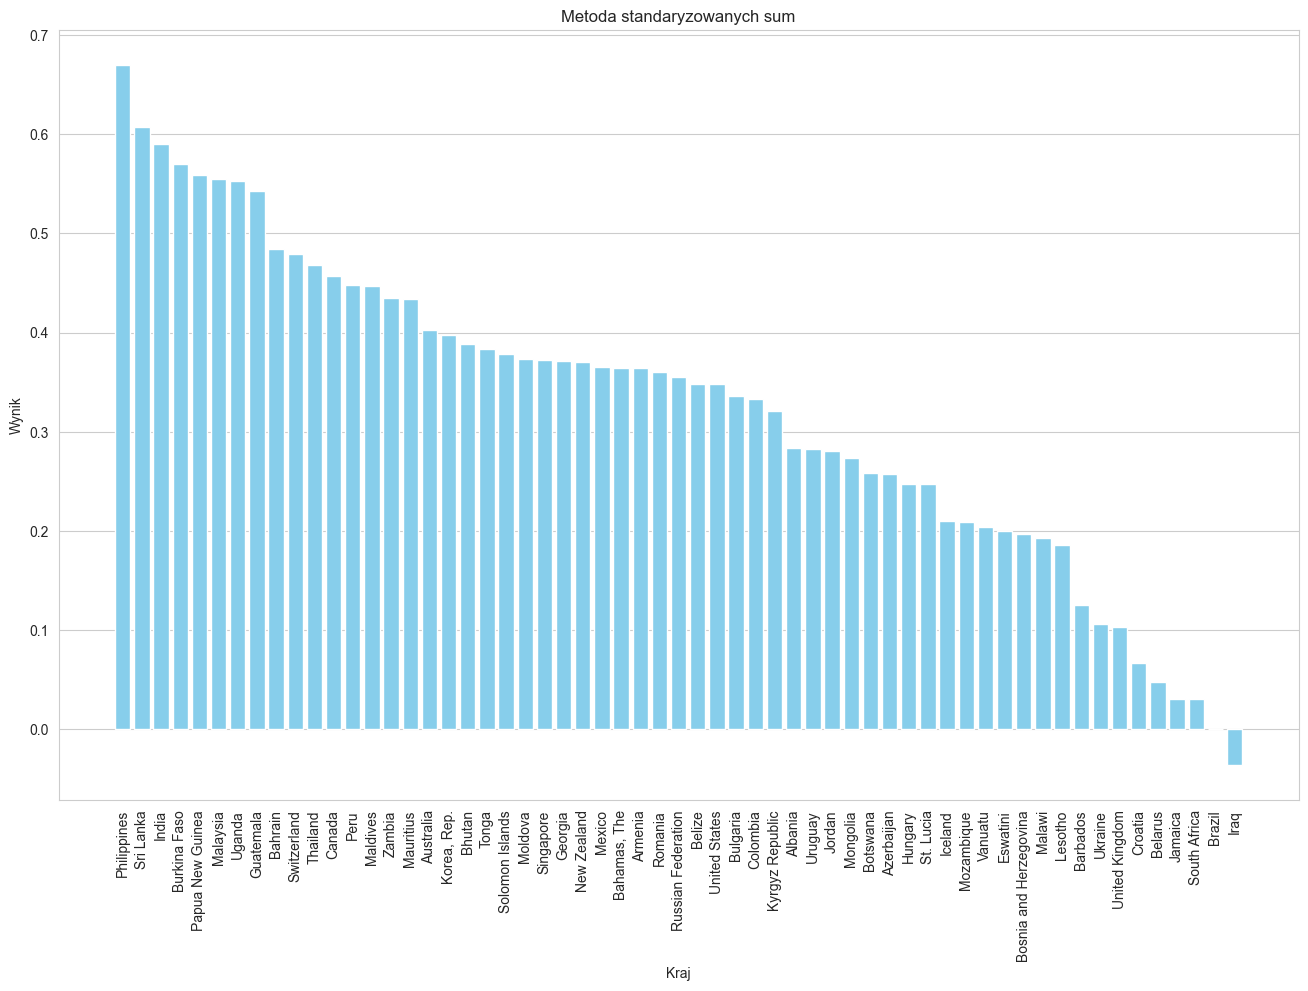

In [105]:
plt.figure(figsize=(16,10))
plt.bar(ranking_hellwig['country_name'], ranking_hellwig['Hellwig_Score'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Kraj')
plt.ylabel('Wynik')
plt.title('Metoda standaryzowanych sum')
plt.grid(axis="x")
plt.show()


## podsumowanie 

- kazda metoda opiera sie na liniowym przeksztalceniu niestety dana sa bardziej nieliniowe co pokaze potem klasteryzacja , kazda metoda ma swoje wady ktore sa wyzej wymienione , hellwig natomaist dobrze wylapal wwydaje sie najbardziej niestabilny kraj np iraq, dobrze rowniez wylapal to ze Emerging markets raczej czesciej beda stabilne gospodarczo, przez to ze np zazwyczaj maja o wiele nizsze dlug do pkb niz np UK/ USA, zostaly mniej dotkniete przez covid jak i wojne na ukrainie etc. Dodatkowo ogolnikowo kazda metoda pokazuje to samo Emerging markets moga byc na ogol bardziej stabilne pdo wzgledem wybranych wskzanikow makro np (inflacja wzrost PKB) niz np Developed markets. 

- Jest to spowodowane ze wiekszosc EM znajduje sie w Azji a po drugie rzecz oczwista kraje z duzym pkb beda na ogół mniec mniejsze wzrost pkb <1 % (nie liczac panstw np Chiny Indie US )

- Wysoka pozycja Emerging Markets sugeruje, że charakteryzują się one większym potencjałem wzrostu gospodarczego i korzystniejszymi wskaznikami fiskalnymi względem wzorca niż gospodarki Developed markets.

-  Oznacza to rowniez, że to właśnie region azjatycki wyróżnia się obecnie najlepszymi wskaźnikami dynamiki wzrostu i stabilności makroekonomicznej według metody Hellwiga.
 

# Clustering

## Hierarchical Clustering

- podejscia na wybor klastrow wezmiemy 2 

- 1 zrobimy max silhouette score 2 na oko tam gdzie dlugosc jest najwieksza na dendrogramie

- Dodatkowo musimy to zaagregowac zeby dostac unique wartosci dla 59 panstw , zdecyowalismy sie na srednia 

In [106]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = data.copy()

features = [
    "Inflation_CPI",
    "Unemployment_Rate",
    "Interest_Rate_perc",
    "GDP_Growth_perc",
    "Public_Debt_perc_of_gdp",
    "GDP_Growth_perc",
    "Government_Revenue_perc_of_gdp"
]

country_means = df.groupby("country_name")[features].mean()

scaler = StandardScaler()
scaler_2 = RobustScaler() # (wartosc -mediana) /IQR bardziej robust na outliery bo uzywana mediany i iqr, outliery maja zdecydowanie mniejsze wplyw na te statystyki opisowe  
X_scaled = scaler.fit_transform(country_means) # skalujemy dane 
X_scaled_2 = scaler_2.fit_transform(country_means) # skalujemy dane 

values_scales_ss = linkage(X_scaled, method='ward')
values_scales_rs = linkage(X_scaled_2, method='ward')

scores_ss = {}
for k in range(2, 40):          
    values = fcluster(values_scales_ss, t=k, criterion='maxclust')
    scores_ss[k] = silhouette_score(X_scaled, values)



scores_rs = {}
for k in range(2, 40):          
    values_2 = fcluster(values_scales_rs, t=k, criterion='maxclust')
    scores_rs[k] = silhouette_score(X_scaled, values_2)






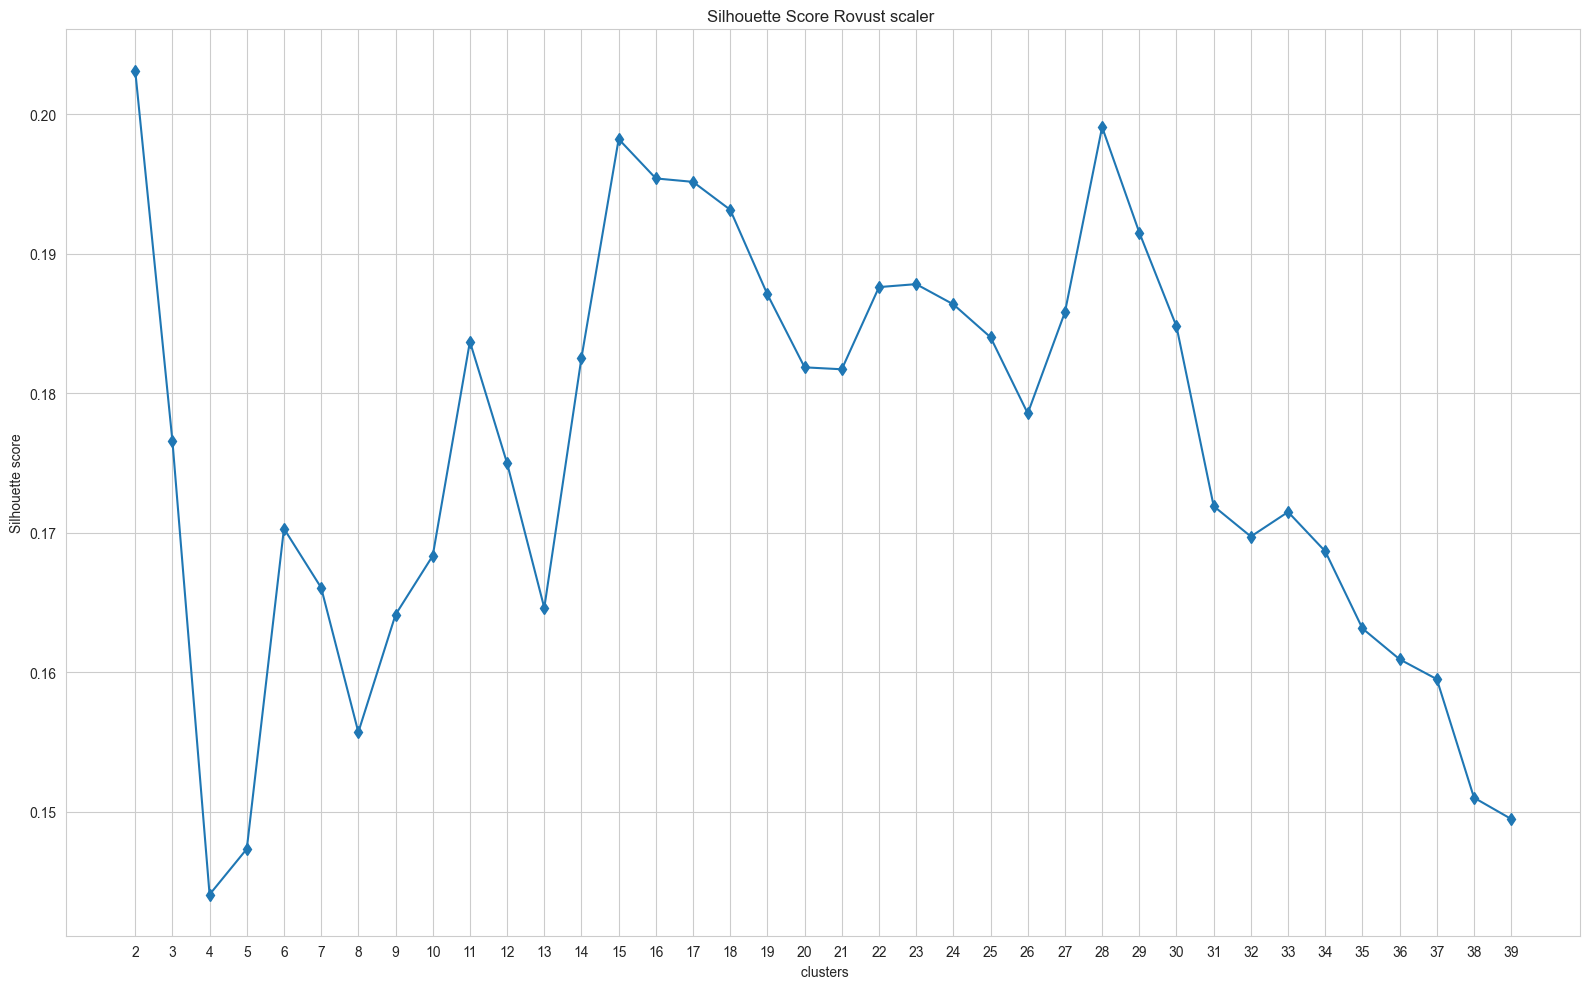

In [107]:
plt.figure(figsize=(16,10))
plt.plot(list(scores_rs.keys()), list(scores_rs.values()), marker='d')
plt.title("Silhouette Score Rovust scaler ")
plt.xlabel(" clusters")
plt.ylabel("Silhouette score")
plt.tight_layout()
plt.xticks(list(scores_rs.keys()))
plt.show()

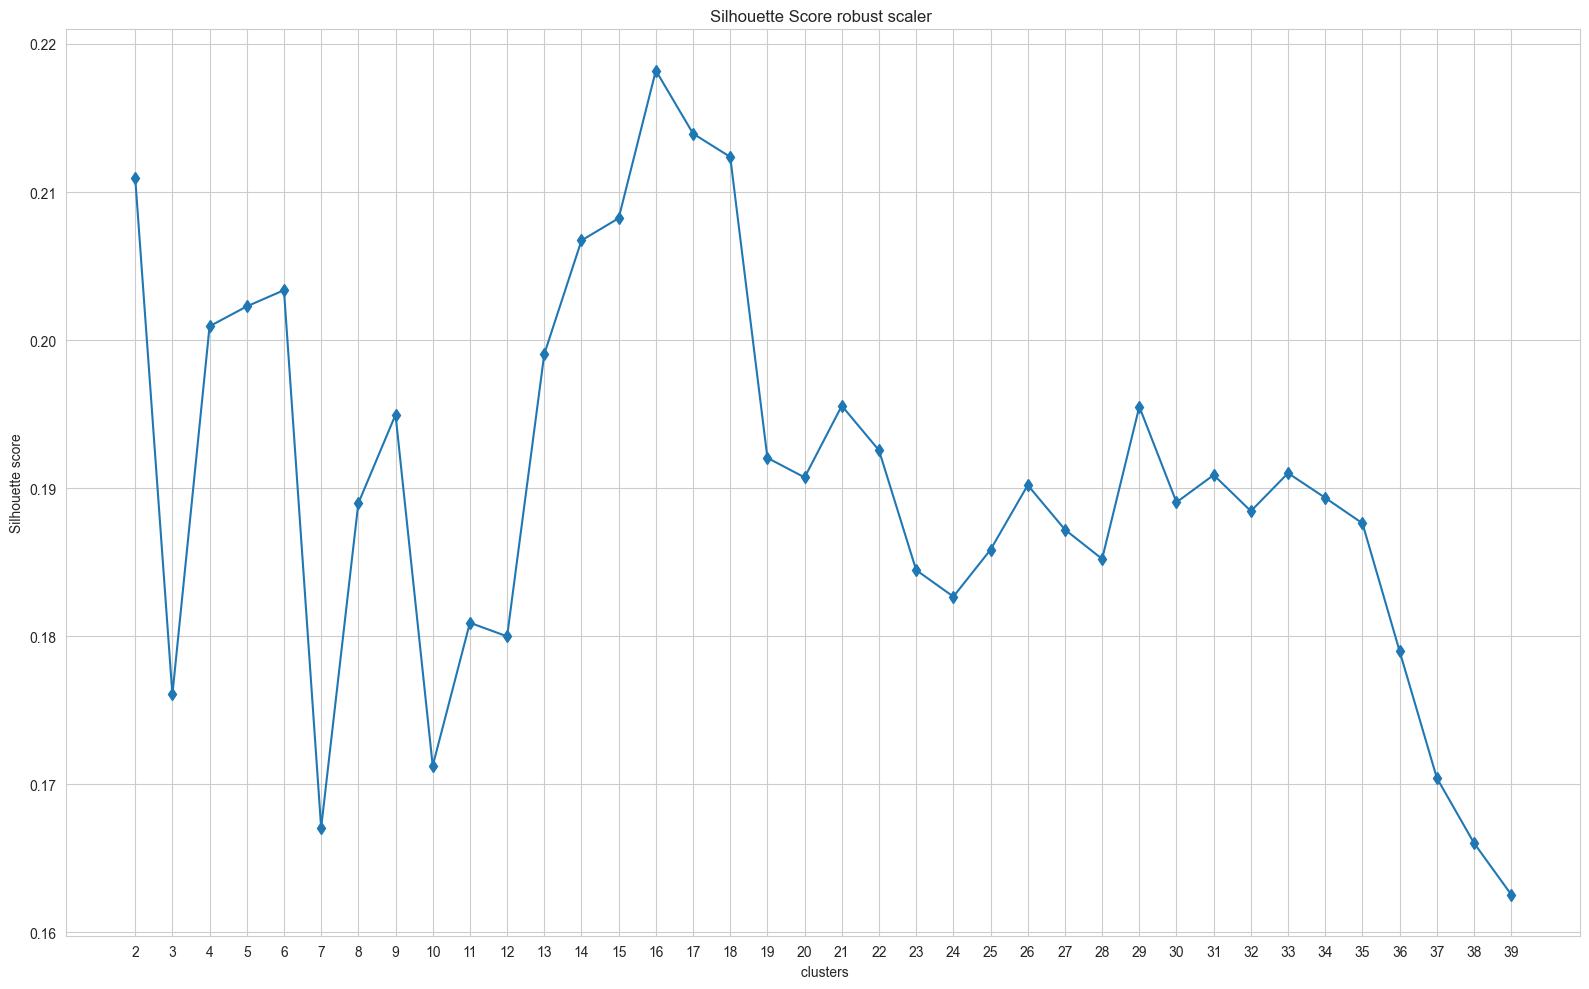

In [108]:
plt.figure(figsize=(16,10))
plt.plot(list(scores_ss.keys()), list(scores_ss.values()), marker='d')
plt.title("Silhouette Score robust scaler ")
plt.xlabel(" clusters")
plt.ylabel("Silhouette score")
plt.tight_layout()
plt.xticks(list(scores_ss.keys()))
plt.show()

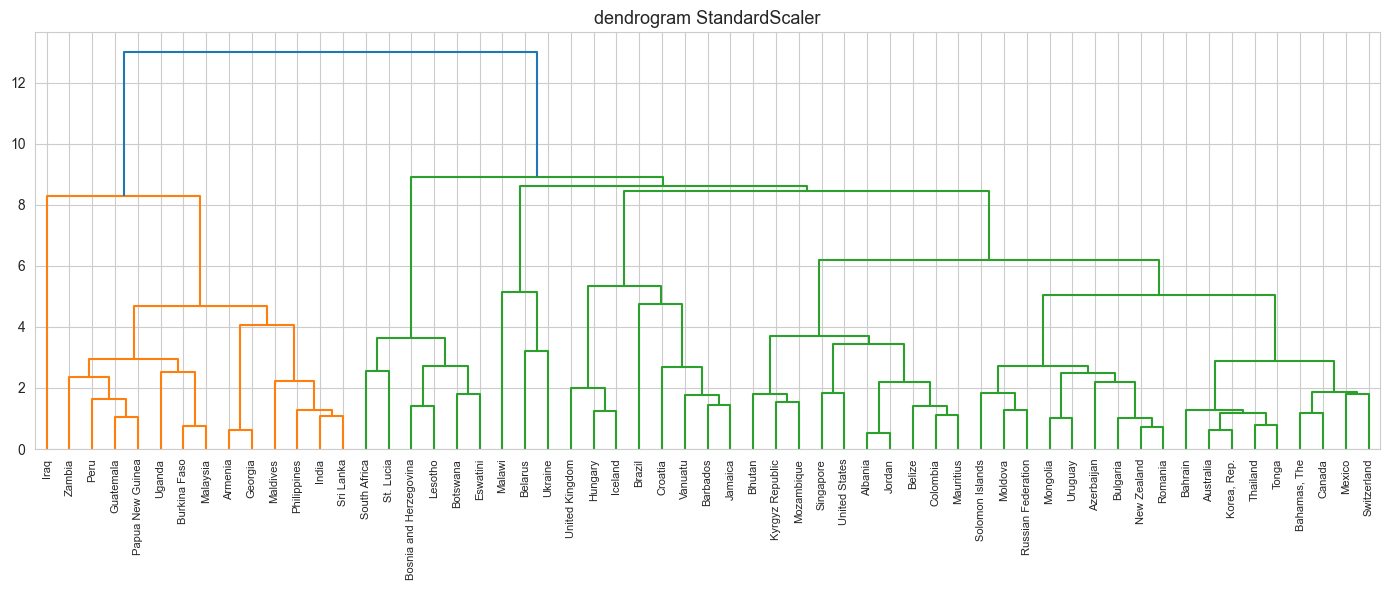

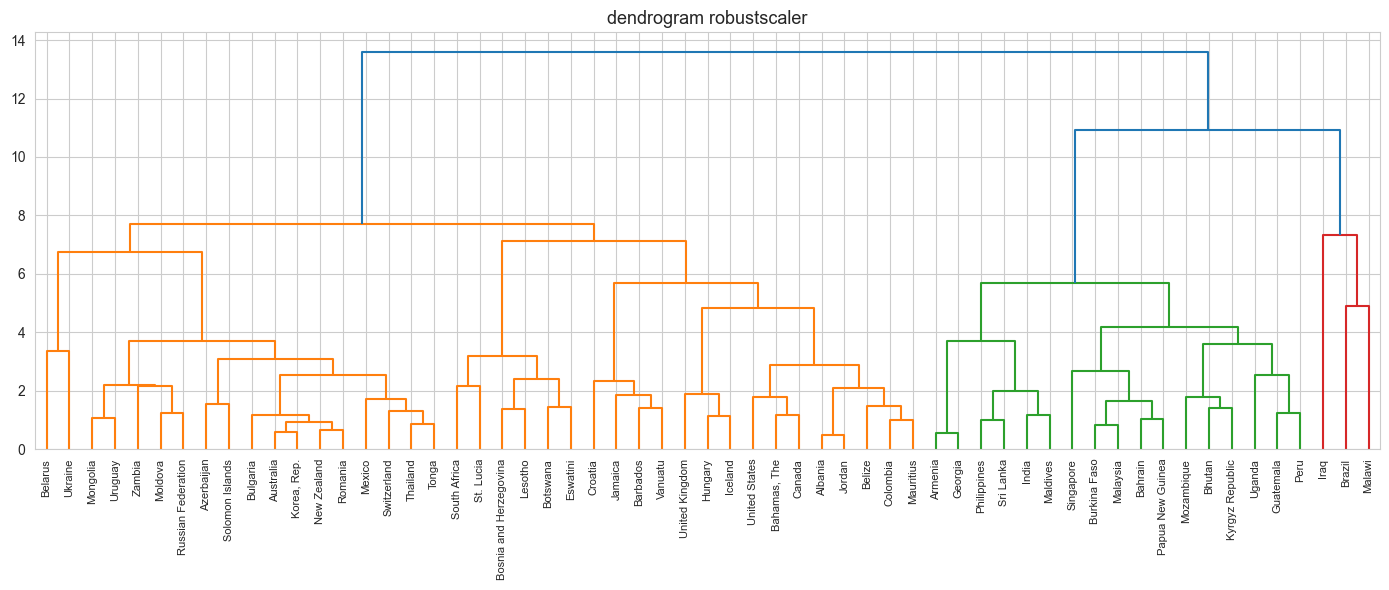

In [109]:
from scipy.cluster.hierarchy import dendrogram

labels = country_means.index.astype(str).tolist()

plt.figure(figsize=(14, 6))
dendrogram(values_scales_ss,
           labels=labels,
           leaf_rotation=90,
           leaf_font_size=8,
           )
plt.title('dendrogram StandardScaler', fontsize=13)
plt.tight_layout()

plt.figure(figsize=(14, 6))
dendrogram(values_scales_rs,
           labels=labels,
           leaf_rotation=90,
           leaf_font_size=8,
           )
plt.title('dendrogram robustscaler', fontsize=13)
plt.tight_layout()
plt.show()



## wizualnie dendrogram


## standard

- **Grupa 1 (gospodarki niestabilne ):** Irak, Zambia, Peru, Filipiny, Bangladesz, Nigeria, Armenia,
  - wyższa inflacja, wieksza zmiennosc wzrostu PKB, wyzsze bezrobocie.
- **Grupa 2 (Emerging markets):** Bułgaria, Rumunia, Polska, Azerbejdżan, Gruzja, Meksyk, Kolumbia
  - umiarkowany wzrost, sredni dlug publiczny, stabilizujaca się inflacja.
- **Grupa 3 (Developed Markets):** Nowa Zelandia, Szwajcaria, Singapur, Bahamy, Korea Pld, Dania, Szwecja, …
  - niska inflacja, stabilny wzrost PKB, wysoka stabilność fiskalna.

---

## robust

- **Klaster 1 (niestabilne):** Irak, Malawi, Izrael 
- **Klaster 2 (rozwijające się, LATAM/Asia):** Peru, Meksyk, Bangladesz, Filipiny
- **Klaster 3 (przejściowe/EM + część OECD):** Rumunia, PL, Wegry, Bulgaria, Korea Pld., Szwajcaria, UK
- **Klaster 4 (Developed):** Bahamy, Szwecja, Dania, Singapur, Nowa Zelandia

---

## Wniosek 

| Skalowanie        | Liczba klastrów | 
|-------------------|----------------------------|
| StandardScaler    | 3                        |  
| RobustScaler      | 4                        |                        

- podzielimy glownie na kraje wedlug rozwoju gospodarczego developed emerging. 

In [110]:
country_means = country_means.round(2).reset_index()

country_means

,country_name,Inflation_CPI,Unemployment_Rate,Interest_Rate_perc,GDP_Growth_perc,Public_Debt_perc_of_gdp,GDP_Growth_perc,Government_Revenue_perc_of_gdp
0,Albania,1.94,14.00,6.50,2.53,74.32,2.53,24.29
1,Armenia,4.09,15.71,7.61,5.42,53.66,5.42,23.78
2,Australia,2.12,5.51,4.22,2.60,44.67,2.60,24.44
3,Azerbaijan,5.05,6.30,9.53,2.12,15.13,2.12,39.46
4,"Bahamas, The",2.01,11.98,2.75,1.12,56.84,1.12,16.36
5,Bahrain,2.02,1.17,4.06,3.70,40.97,3.70,22.20
6,Barbados,3.36,10.75,5.45,-0.46,106.81,-0.46,23.44
7,Belarus,19.85,5.61,-6.28,1.84,31.79,1.84,29.26
8,Belize,1.11,8.36,10.02,2.62,62.07,2.62,21.52
9,Bhutan,6.15,3.03,8.38,4.50,83.25,4.50,18.92


In [111]:


final_labels_standard_d = fcluster(values_scales_ss, t=3, criterion='maxclust') 


final_labels_robust_d =  fcluster(values_scales_ss, t=4, criterion='maxclust')


In [112]:
final_labels_standard_d

array([3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 1, 3, 3, 3, 2, 1, 1, 3,
       3, 1, 1, 3, 3, 3, 3, 2, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3,
       3, 3, 2, 1, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1], dtype=int32)

## dobieranie silhouette score

In [113]:
final_labels_standard = fcluster(values_scales_ss, t=2, criterion='maxclust') 


final_labels_robust =  fcluster(values_scales_ss, t=16, criterion='maxclust')



- dobiearmy w both cases max silhouette score w

- standard mowi 2 , natomiast robust 16 klastrow

In [114]:
country_means['labels_standard_d'] =final_labels_standard_d

country_means['labels_robust_d'] =final_labels_robust_d

country_means['labels_standard'] =final_labels_standard

country_means['labels_robust'] =final_labels_robust




In [115]:
display(country_means['labels_standard_d'].value_counts()) ,display(country_means['labels_robust_d'].value_counts())

labels_standard_d
3    39
1    14
2     6
Name: count, dtype: int64

labels_robust_d
4    36
1    14
2     6
3     3
Name: count, dtype: int64

(None, None)

In [116]:
display(country_means['labels_standard'].value_counts()) ,display(country_means['labels_robust'].value_counts())

labels_standard
2    45
1    14
Name: count, dtype: int64

labels_robust
16    9
15    9
1     7
14    5
10    4
6     4
3     4
12    3
9     3
2     2
7     2
13    2
5     2
11    1
4     1
8     1
Name: count, dtype: int64

(None, None)

## Wizualizacja 

- wizualiacja zrobilismy uzywajac (PCA -> liniowe zaleznosci ) i takze U-MAP -> nieliniowe zaleznosci

## PCA

## visualiation 

In [117]:
def plot_pca(labels, title,X_pca,countries):
    plt.figure(figsize=(16,10))
    cmap_bright = plt.cm.get_cmap('tab20', 20)

    scatter = plt.scatter(
        X_pca[:,0], X_pca[:,1],
        c=labels, cmap=cmap_bright,
        s=110, edgecolor='black', linewidth=0.8, alpha=0.9
    )

    for i, name in enumerate(countries):
        plt.text(X_pca[i,0]+0.05, X_pca[i,1]+0.05, name,
                fontsize=8.5, color='dimgray', alpha=0.85)

    unique_labels = sorted(set(labels))
    handles, _ = scatter.legend_elements(prop="colors", alpha=0.9)
    plt.legend(
        handles,
        [f"Klaster {i}" for i in unique_labels],
        title=f"Liczba klastrów: {len(unique_labels)}",
        loc="best",
        fontsize=10
    )

    plt.title(title, fontsize=14, weight='bold', pad=10)
    plt.xlabel('Główna składowa 1 (PC1)', fontsize=11)
    plt.ylabel('Główna składowa 2 (PC2)', fontsize=11)
    plt.grid(True, alpha=0.25)
    plt.tight_layout()
    plt.show()

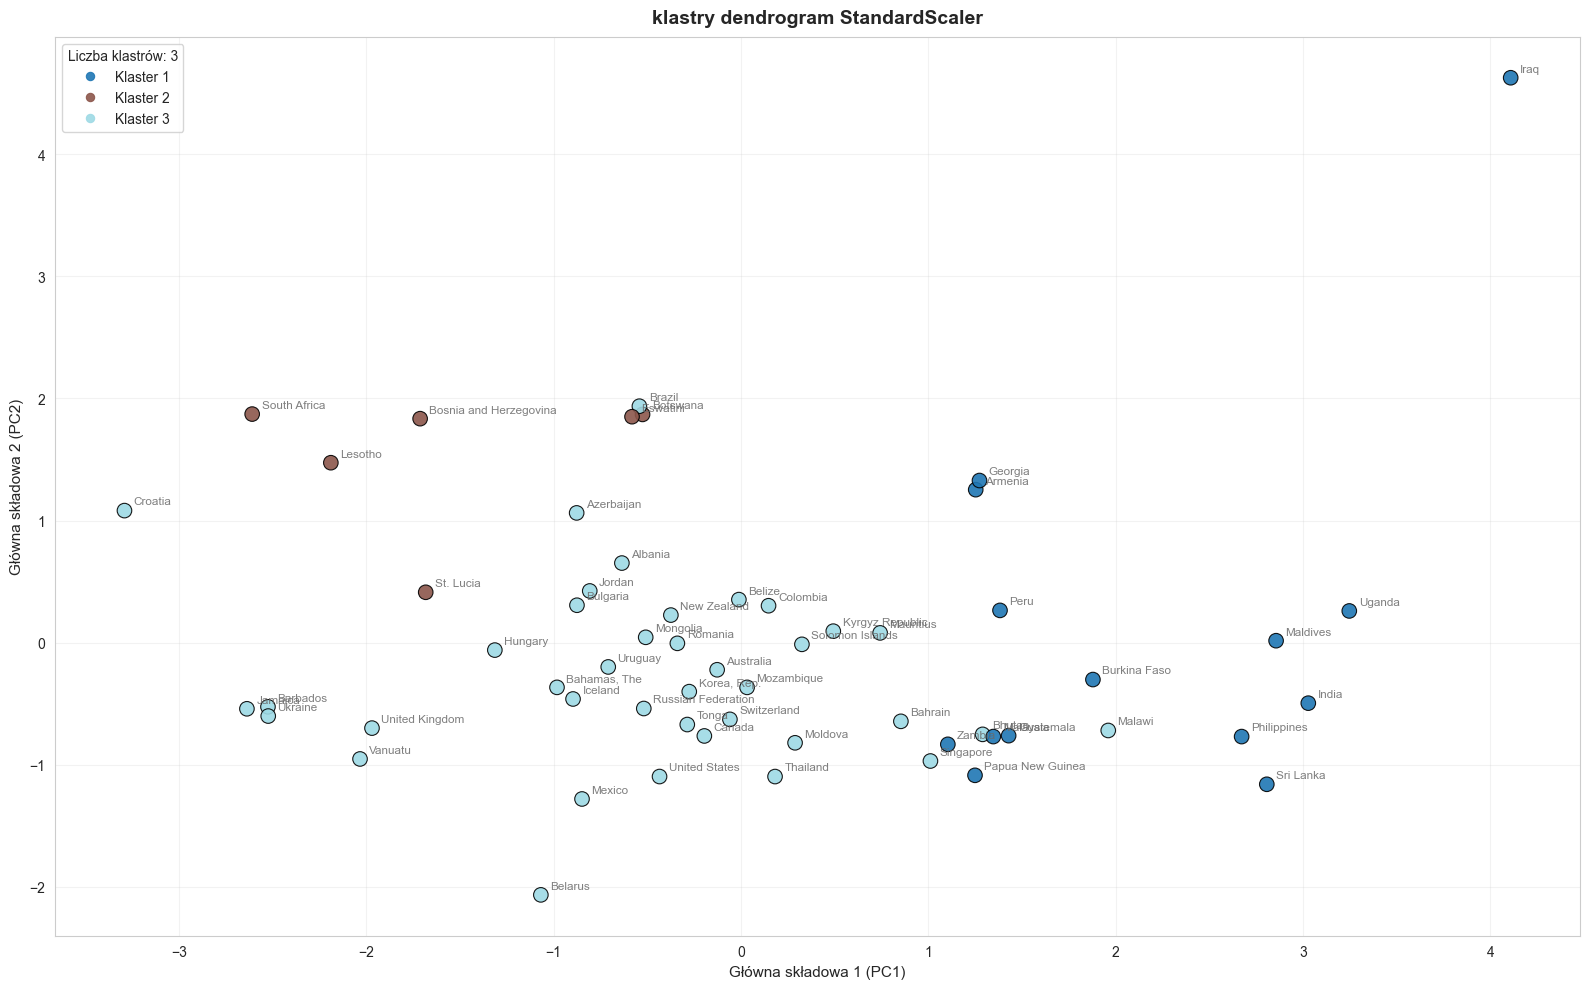

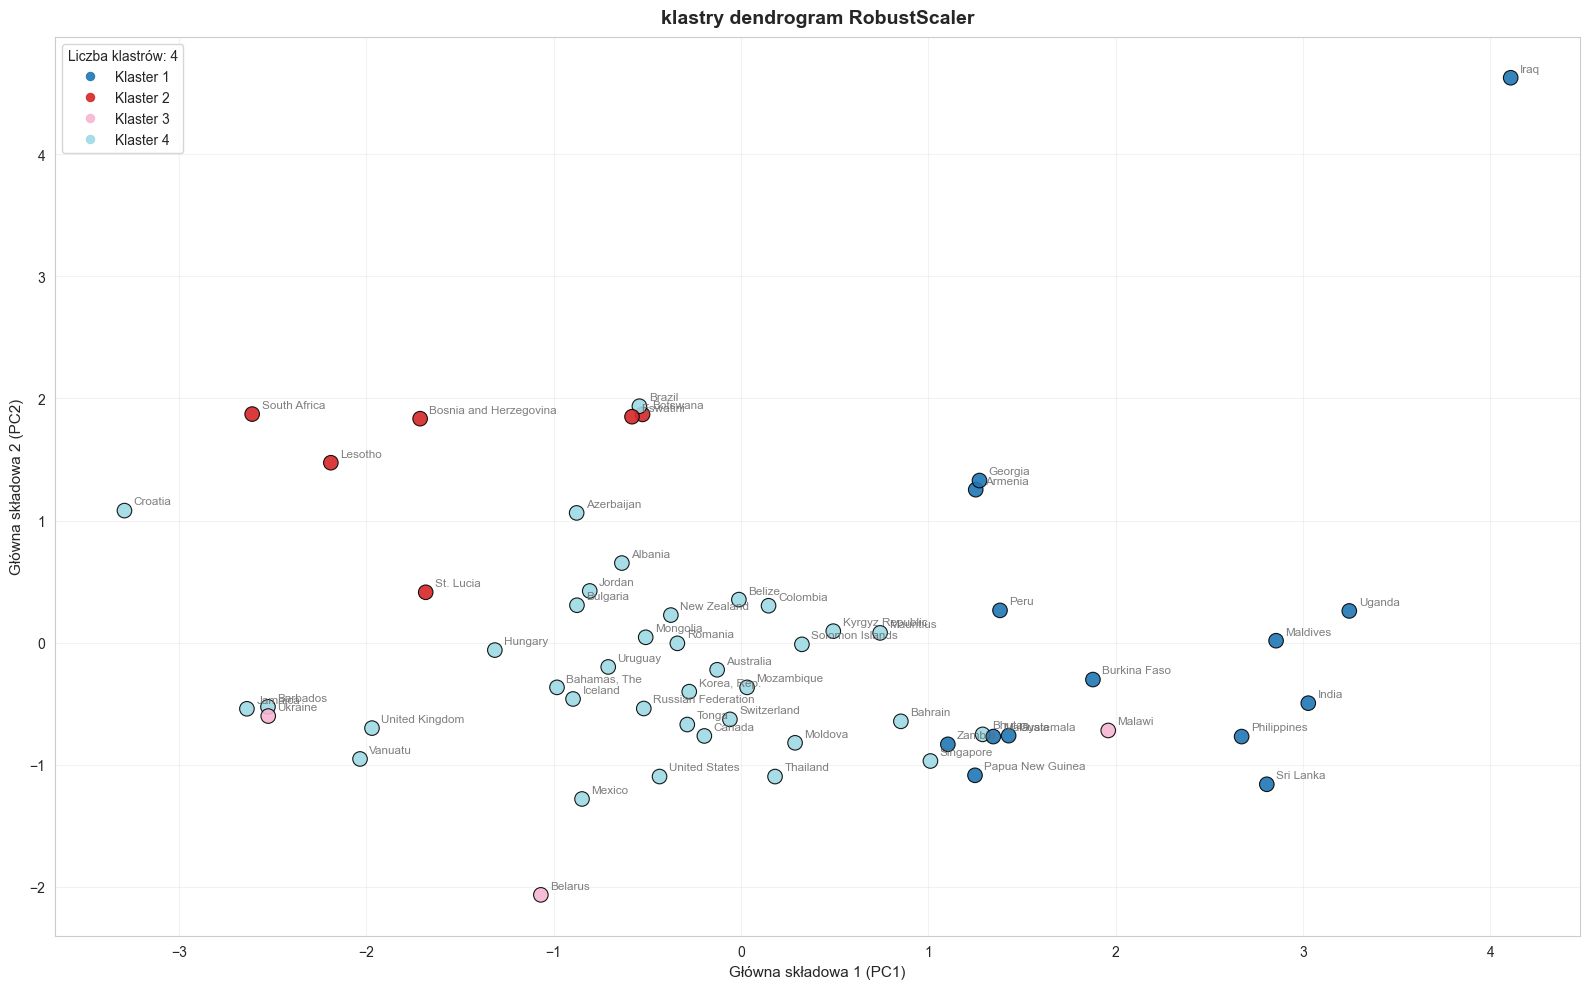

In [118]:
from sklearn.decomposition import PCA

X = country_means.select_dtypes(include='number').drop(columns=[
    'labels_standard_d', 'labels_robust_d', 'labels_standard', 'labels_robust'
])
countries = country_means['country_name']

scaler = StandardScaler()
X = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plot_pca(country_means['labels_standard_d'], 'klastry dendrogram StandardScaler',X_pca,countries)

plot_pca(country_means['labels_robust_d'], 'klastry dendrogram RobustScaler',X_pca,countries)



## silhouette score based 

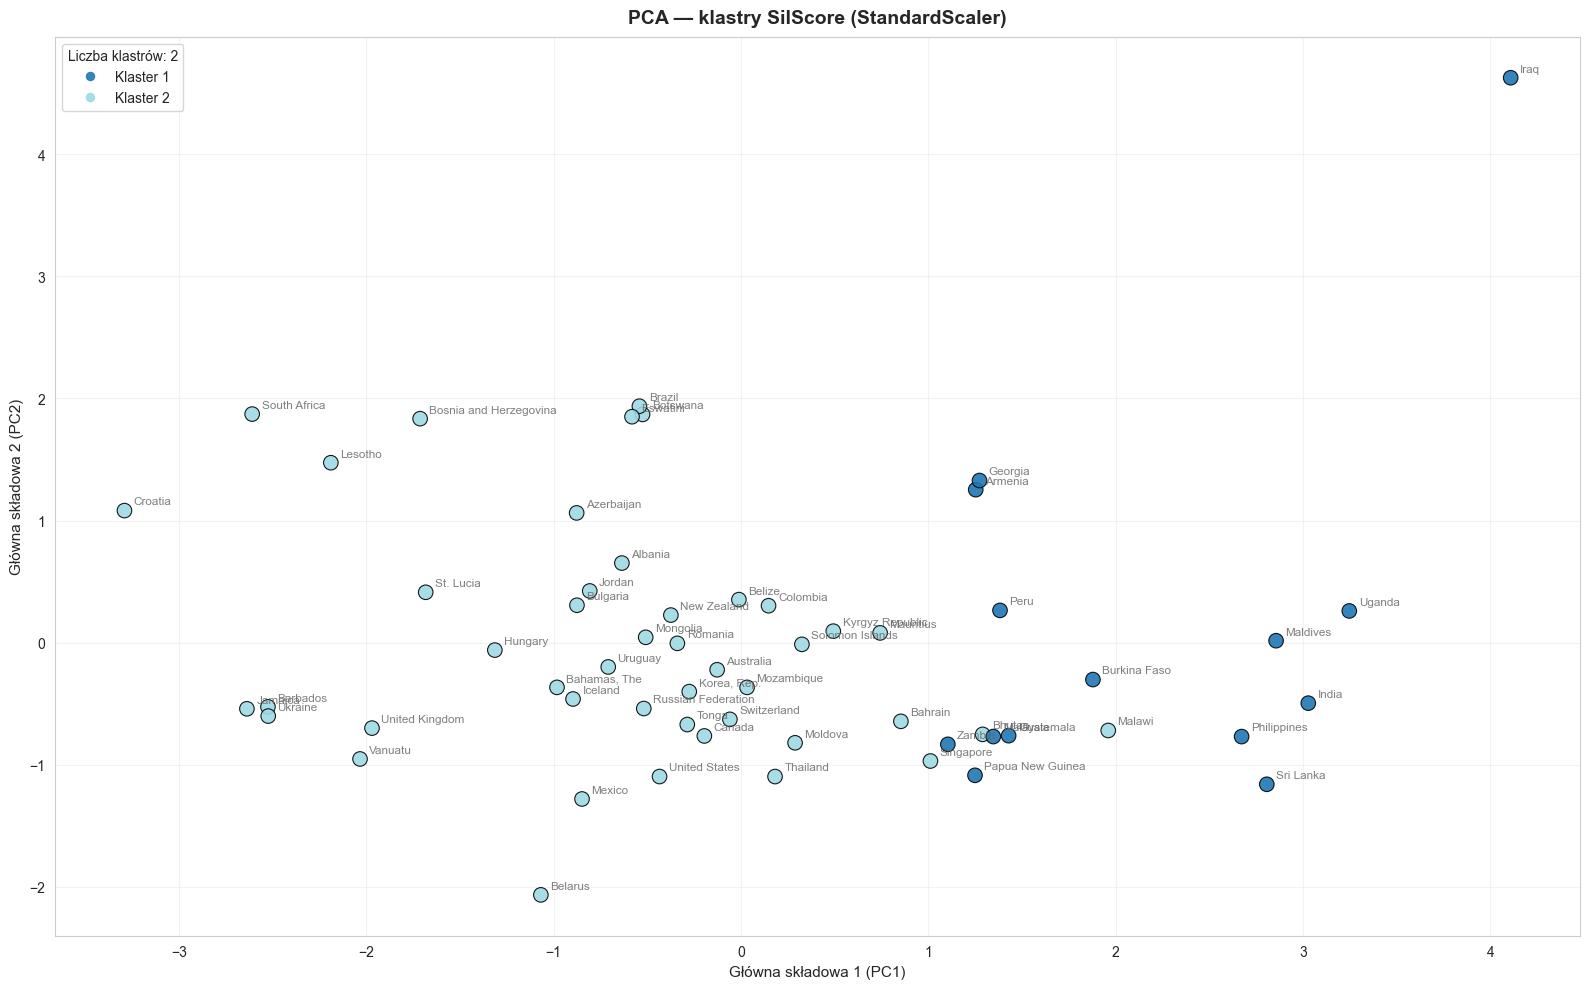

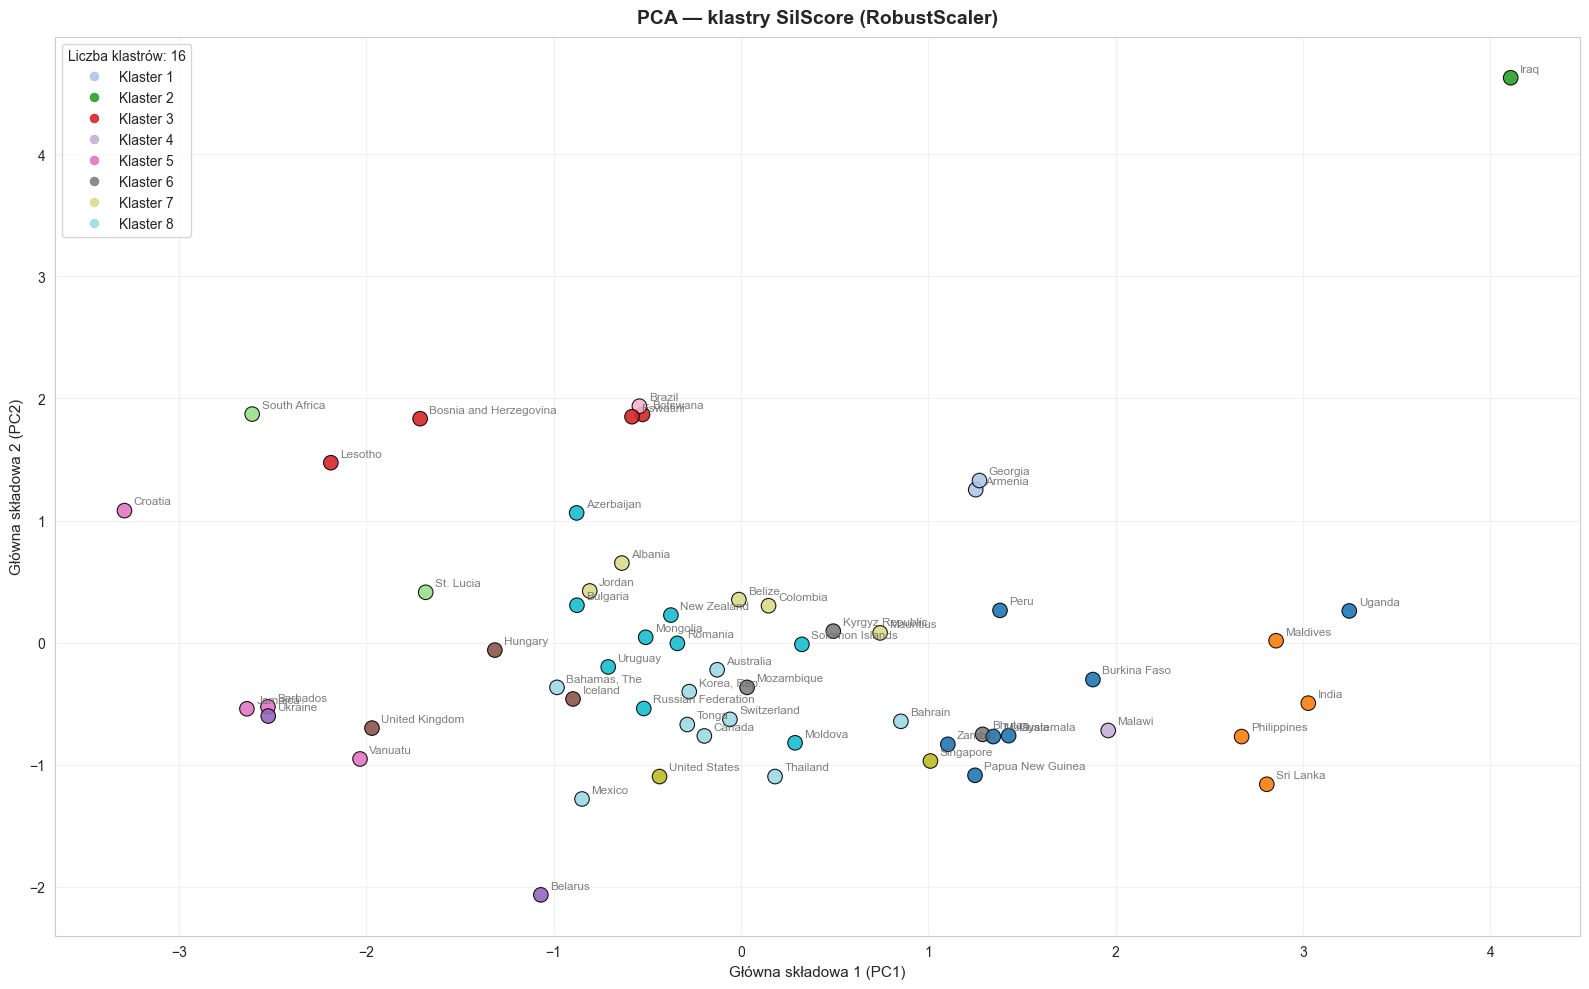

In [119]:
plot_pca(country_means['labels_standard'], 'PCA — klastry SilScore (StandardScaler)',X_pca,countries)

plot_pca(country_means['labels_robust'], 'PCA — klastry SilScore (RobustScaler)',X_pca,countries)



In [120]:
print(f"Wariancja wyjaśniona przez PC1 i PC2: {pca.explained_variance_ratio_.sum():.2%}") 


Wariancja wyjaśniona przez PC1 i PC2: 53.09%


## Wnioski

- jeden z wiekszych minus chierarchical clustering slabo outliery wylapuje, co jest dosyc mocno widoczne na wykresi, notabene jest to jeden z najwiekszych minusow Centroid-based clustering.

- wariancja wyjasniona przez 2 komponenty jest dosyc mala bo tylko 53% utracilismy sporo informacji ,jednakze wizualizacja nadal dostarcza nam dobry wglad w to jak wygladaja dane. 

- brak liniowych zaleznosci , kraje sa dosyc moocno porozrzucane , w nielicznych miejscach jestesmy w stanie znalezc jakies lokalne struktury np (Indie filipiny, sri lanka malezja etc)

- Wykresy z Standard Scaler majace po 2- 16 klastow dosyc skrajne nie mowia nam nic szczegolnego o strukutrze wykres z 2 klastrami jest zbyt ogolny a z 16 jest zbyt szczegolowy.

- Natomiast wykres z Robust scaler + 3/4 klastry jest o wiele lepszy podzial wizualny na kraje, zatem max(silhouette score sprawdzil sie zdecydowanie gorzej niz Wizualne cięcie dendrogramu).

- Podsumowujac

1. **approx Optymalna liczba klastrów (3)**  
   - Trzy klastry zapewniają balasn między szczegolowoscia a czytelnoscia.  
   Większa liczba klastrów prowadziłaby do nadmiernego rozdrobnienia,  
   natomiast mniejsza – do zbyt uproszczonego podziału krajów.

2. **Wyraźne grupy i mało nakładania się punktów**  
   - Klastery są dosyc dobrze odseparowane przez PCA,  
   Widoczne grupy krajow roznia się m.in. poziomem inflacji, wzrostu PKB i długu publicznego,
   poza niektorymi przypadkami krajow np UK kolo ukariny albo Vanuatu.

3. **czytelnosc**  
   - Dwie pierwsze składowe główne (PC1 i PC2) wyjaśniają 53,09% wariancji,  
   co pozwala w sposób klarowny zobaczyć zróżnicowanie gospodarek.  
   Klastry układają się logicznie: od stabilnych (po lewej) po bardziej niestabilne (po prawej).

4. **kraje w klastrach**
    - Klastry wydają się wymieszane pod względem geograficznym jak i rozwoju gospodarczego,  
    co oznacza, że w jednej grupie znajdują się zarówno gospodarki Developed, jak Emerging markets.  
    Struktura klastrów sugeruje raczej podobieństwo ogólnego profilu makroekonomicznego  
    (np. zrównoważenie między inflacją, wzrostem PKB i zadłużeniem).
    
    Mozna znalezc pary ktore sa dobrze odwzorowane np (malediwy,uganda,Sri Lanka, filipiny), albo gruzja i armenia
    a posrod nich zle np Indie. Klaster 2 jest troche za bardzo wymieszany.
    Najlepiej wydaje sie rozdzielony klaster 1 gdzie sa kraje z punktu widzenia ekonomicznego dobrze wydzielone np Lesotho i RPA, Bosnia czy tez botswana.

5. **nieliniowość zależności ekonomicznych**  

    - Brak iniowych zależności między zmiennymi.  
    W szczególności zauwazylismy, że wiekszy poziom długu publicznego nie zawsze oznacza gorszą kondycję gospodarczą.  
    W Developed markets wyzsze zadluzenie wystepuje czesto ze stabilnymi wskaźnikami inflacji i wzrostu pkb.  
    W Emerging Markets podobny poziom długu może prowadzić do niestabilności finansowej np bialorus ukraina,RPA.  



In [121]:
country_means

,country_name,Inflation_CPI,Unemployment_Rate,Interest_Rate_perc,GDP_Growth_perc,Public_Debt_perc_of_gdp,GDP_Growth_perc,Government_Revenue_perc_of_gdp,labels_standard_d,labels_robust_d,labels_standard,labels_robust
0,Albania,1.94,14.00,6.50,2.53,74.32,2.53,24.29,3,4,2,14
1,Armenia,4.09,15.71,7.61,5.42,53.66,5.42,23.78,1,1,1,2
2,Australia,2.12,5.51,4.22,2.60,44.67,2.60,24.44,3,4,2,16
3,Azerbaijan,5.05,6.30,9.53,2.12,15.13,2.12,39.46,3,4,2,15
4,"Bahamas, The",2.01,11.98,2.75,1.12,56.84,1.12,16.36,3,4,2,16
5,Bahrain,2.02,1.17,4.06,3.70,40.97,3.70,22.20,3,4,2,16
6,Barbados,3.36,10.75,5.45,-0.46,106.81,-0.46,23.44,3,4,2,10
7,Belarus,19.85,5.61,-6.28,1.84,31.79,1.84,29.26,3,3,2,7
8,Belize,1.11,8.36,10.02,2.62,62.07,2.62,21.52,3,4,2,14
9,Bhutan,6.15,3.03,8.38,4.50,83.25,4.50,18.92,3,4,2,12


## UMAP

- Uzyjemy teraz algorytmu U-map ktory pozwala na wizualizacje nieliniowych zaleznosci (z definicji PCA w formie plain vanilla jest uzywana do liniowych zaleznosci, istnieja oczywiscie odmiany takie jak Kernel-PCA jednakze ze wzgledu na popularnosc UMAP jak i wieksza nasza wiedze na jego temat wybralismy wlasnie go) 

- Ze wzgledu na brak sensowych wynikow dla PCA gdzie dobor klastrow bazuje na Silhouette score, skupimy sie tylko na dobrze ktory bazuje na dendrogramie i Standard Scaler bo Robust z czwarty klaster z tylko 3 krajami 

- Umap (intuicyjnie) polega na stworzeniu 2 grafow jeden benchmarkowy ktory chemy odwzorowywac i drugi initial (tworzymy wstepny graf nad postawie spectral clustering/embedding) ktory bedziemy przyblizac jaknajblizej benchmarku uzywajac SGB. 

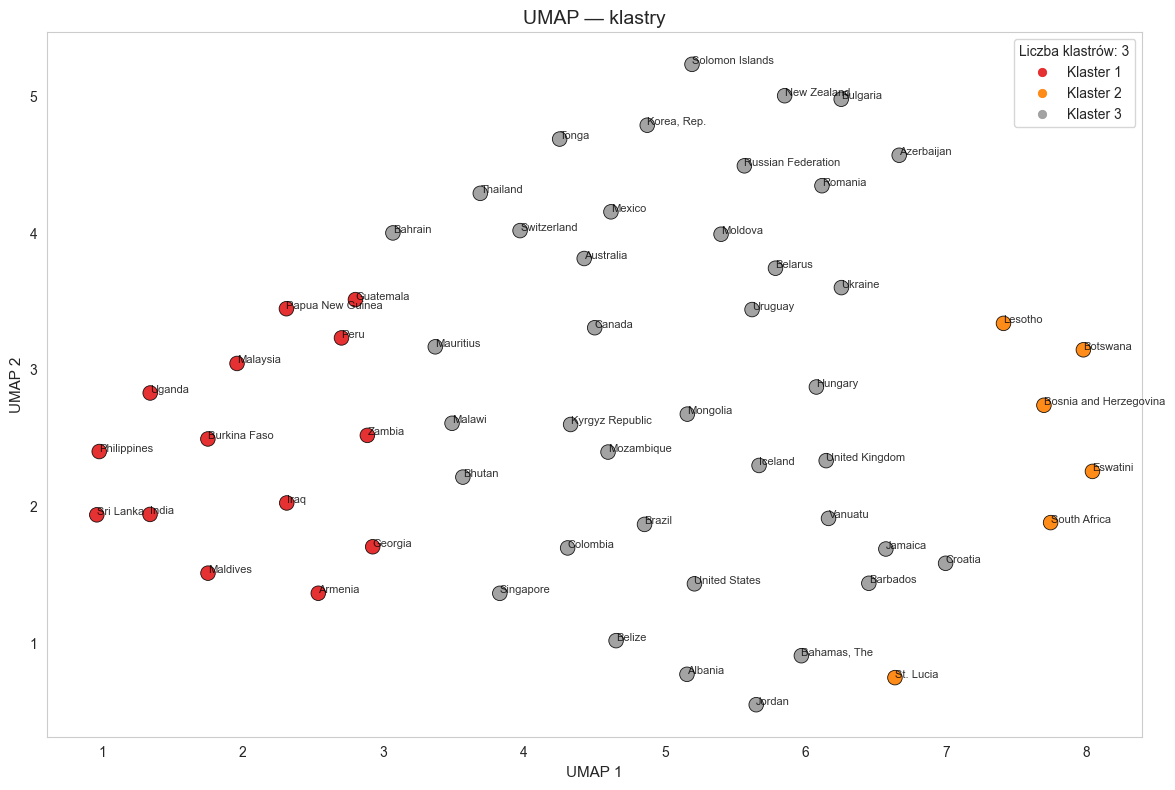

In [122]:
import umap

X = country_means.select_dtypes(include=np.number).drop(columns=[
    'labels_standard_d', 'labels_robust_d', 'labels_standard', 'labels_robust'
])
labels = country_means['labels_standard_d']

X_scaled = StandardScaler().fit_transform(X)

reducer = umap.UMAP(n_neighbors=10, min_dist=0.4, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

plt.figure(figsize=(12,8))
palette = sns.color_palette("Set1", len(set(labels)))

scatter = plt.scatter(X_umap[:,0], X_umap[:,1],
                      c=labels, cmap='Set1',
                      s=110, edgecolor='black', linewidth=0.6, alpha=0.9)

for i, name in enumerate(country_means['country_name']):
    plt.text(X_umap[i,0], X_umap[i,1], name,
             fontsize=8, color='black', alpha=0.8)

legend_labels = [f"Klaster {i}" for i in sorted(set(labels))]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels,
           title=f"Liczba klastrów: {len(set(labels))}")

plt.title("UMAP — klastry", fontsize=14)
plt.xlabel("UMAP 1", fontsize=11)
plt.ylabel("UMAP 2", fontsize=11)
plt.grid(False)
plt.tight_layout()
plt.show()


## podsumowanie

1. **Klastry**  
   - UMAP dobrze oddzielił trzy główne grupy krajów, zachowując zarówno lokalne, jak i częściowo globalne relacje między nimi.  
    
   - Klaster 1 tworzy spójną strukturę w lewej części wykresu — obejmuje głównie gospodarki o wyższej inflacji i niestabilności makroekonomicznej (Iraq gruzja zambia etc). Oprocz oczywiscie Indii  
   
   - Klaster 2 skupia kilka krajów afrykańskich (RPA, Botswana, Lesotho, Eswatini) – państwa rozwijające się o średnim poziomie zadłużenia i stabilnym wzroście.  
   
   - Klaster 3 obejmuje szeroką grupę krajów zróżnicowanych gospodarczo mieszankę Emerging i Developed markets, od USA i Wielkiej Brytanii po Azerbejdżan i Mongolię, ciezko jest z tego cos wywnioskowac.

2. **Interpretacja ekonomiczna**  
   - Widoczna jest nieliniowa zależność między wskaźnikami – kraje o podobnym poziomie zadłużenia nie zawsze należą do tego samego klastra, co potwierdza, że wysokie zadłużenie nie musi oznaczać niestabilności (np. USA).  
   - Wśród krajów rozwijających się (np. Irak, Armenia, Gruzja) wysoka inflacja i niestabilne stopy procentowe prowadzą do wyraźnej separacji w przestrzeni UMAP.

4. **Wnioski ogólne**  
   - Redukcja wymiarów UMAP lepiej niż PCA pokazuje nieliniowe zależności między krajami.  
   - Wizualnie potwierdza, że klasteryzacja hierarchiczna z 3 grupami tworzy lepiej interpretowalny podział, mimo że granice między klastrami nie są całkowicie ostre.

# K-means

- tutaj rowniez dane zaagregujemy i wezmiemy srednia i wybierzemy ilosc klastrow uzywajac elbow method 

In [123]:
features2=features+['country_name']

features

['Inflation_CPI',
 'Unemployment_Rate',
 'Interest_Rate_perc',
 'GDP_Growth_perc',
 'Public_Debt_perc_of_gdp',
 'GDP_Growth_perc',
 'Government_Revenue_perc_of_gdp']

In [124]:
dat2 = data.loc[:,features2] 


type(dat2)

pandas.core.frame.DataFrame

In [125]:
country_means_km=country_means.loc[:,~country_means.columns.isin(['labels_standard_d','labels_robust_d','labels_standard','labels_robust'])]

In [126]:
country_means_km =country_means_km.select_dtypes(np.number)

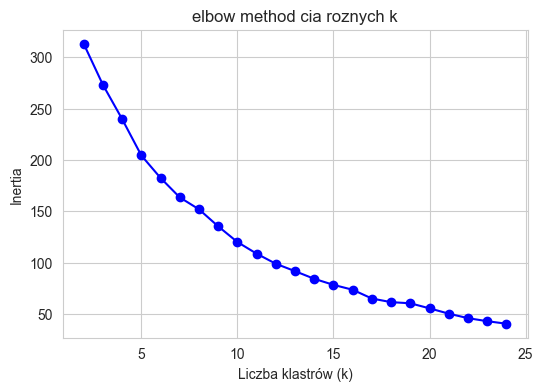

In [127]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
scaled_data = scaler.fit_transform(country_means_km)

inertia = []

for k in range(2, 25):
    kmeans = KMeans(n_clusters=k, random_state=42,init='k-means++',n_init=20,max_iter=300) # ustawione ++ zeby zapobiec sytacji ze 2 punkty wylosuje sie bardzo blisko siebie 
                                                                                            # 2 n_init zeby algorytm odpalil sie dla kazdego klastra 20 razy i wybral min (WCSS)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(6,4))
plt.plot(range(2, 25), inertia, 'bo-')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Inertia')
plt.title('elbow method cia roznych k')
plt.show()





In [128]:
pd.Series(inertia).diff().round(2)

0       NaN
1    -39.96
2    -33.37
3    -35.46
4    -21.92
5    -18.96
6    -11.60
7    -16.58
8    -15.29
9    -11.34
10    -9.84
11    -7.20
12    -7.47
13    -5.88
14    -4.78
15    -8.55
16    -3.51
17    -1.11
18    -4.93
19    -5.17
20    -4.38
21    -2.95
22    -2.47
dtype: float64

In [129]:
pd.Series(inertia)

0     313.124807
1     273.162212
2     239.787263
3     204.329130
4     182.408969
5     163.450304
6     151.845703
7     135.264340
8     119.975642
9     108.633659
10     98.791745
11     91.594044
12     84.128449
13     78.249370
14     73.467071
15     64.917839
16     61.404086
17     60.289849
18     55.355489
19     50.187182
20     45.810828
21     42.860831
22     40.386988
dtype: float64

- zatem uzyjemy 3 wdg elbow method 

- policzmy jeszcze z ciekawosci silhouette score 

In [130]:

for k in [3,4,5,6,7,8,9,10,11,12,13]:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        init='k-means++',
        n_init=20,
        max_iter=300
    )
    labels = kmeans.fit_predict(scaled_data)
    sil_score = silhouette_score(scaled_data, labels)
    print(f"Silhouette Score dla k = {k}: {sil_score:.4f}")


Silhouette Score dla k = 3: 0.1784
Silhouette Score dla k = 4: 0.1933
Silhouette Score dla k = 5: 0.1995
Silhouette Score dla k = 6: 0.1789
Silhouette Score dla k = 7: 0.1939
Silhouette Score dla k = 8: 0.1561
Silhouette Score dla k = 9: 0.1768
Silhouette Score dla k = 10: 0.1825
Silhouette Score dla k = 11: 0.1913
Silhouette Score dla k = 12: 0.2021
Silhouette Score dla k = 13: 0.2004


- wezmy zatem 5 klastrow i 3 i porownamy roznice wizualne 12 i 13 to juz za malo liczne powstana grupy. 

In [131]:
kmeans_3_clust = KMeans(n_clusters=5,random_state=42,init='k-means++',n_init=20,max_iter=300)

In [132]:
kmeans_5_clust = KMeans(n_clusters=5,random_state=42,init='k-means++',n_init=20,max_iter=300)

## visualization 

- wiemy juz ( empirycznie pokazalismy) PCA na naszych danych dobrze nie zadzaiala, zatem ogarniczmy sie ponownie do UMAP

## fit dla k=3  

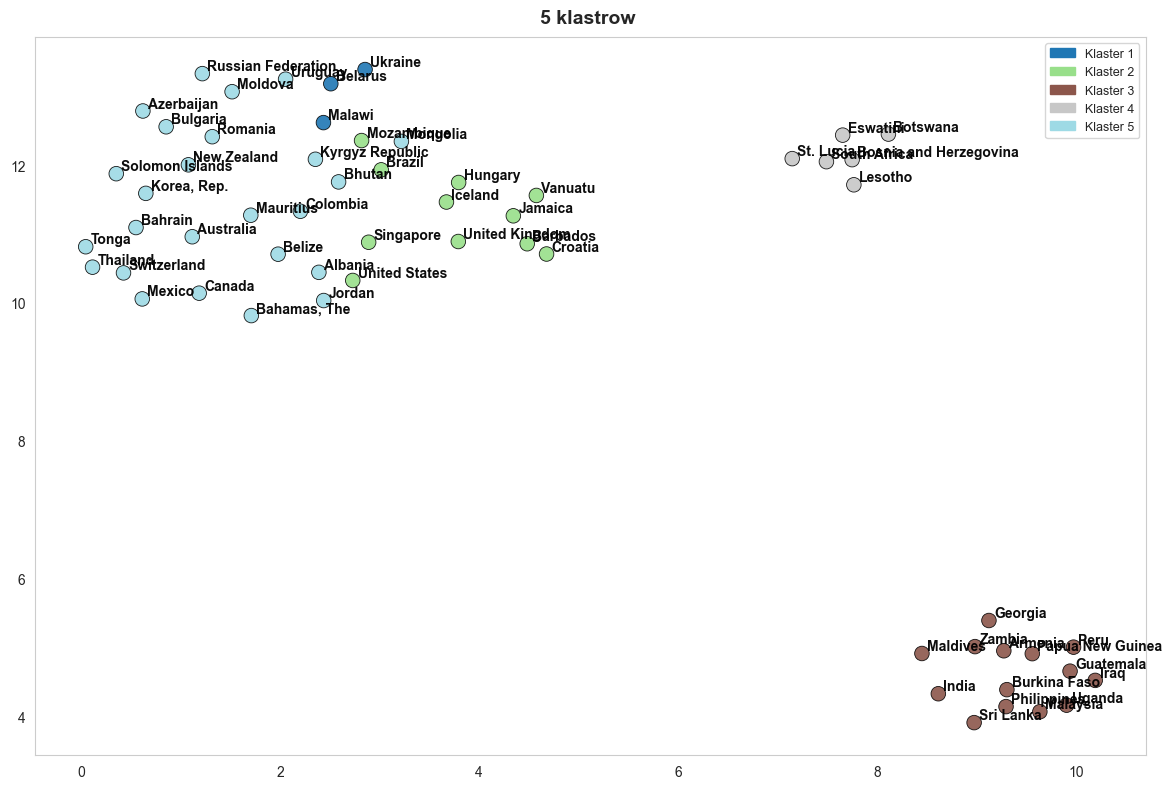

In [140]:
import matplotlib.patches as mpatches

scaler22 = StandardScaler()
scaled_data = scaler22.fit_transform(country_means.select_dtypes(include='number'))

kmeans_3_clust = KMeans(n_clusters=5,random_state=42,init='k-means++',n_init=20,max_iter=300)

labels = kmeans_3_clust.fit_predict(scaled_data)

reducer = umap.UMAP(n_neighbors=10, min_dist=0.35, random_state=42)
X_umap = reducer.fit_transform(scaled_data)

plt.figure(figsize=(12,8))
unique = np.unique(labels)
cmap = plt.cm.get_cmap('tab20', unique.size)

plt.scatter(X_umap[:, 0],X_umap[:, 1],c=labels,cmap=cmap,s=110,edgecolor='black',linewidth=0.6,alpha=0.9)

for i, name in enumerate(country_means['country_name'].tolist()):
     plt.text(
        X_umap[i,0] + 0.05, X_umap[i,1] + 0.05, name,
        fontsize=10, color='black', weight='bold', alpha=0.95
    )

plt.legend(handles=[mpatches.Patch(color=cmap(i), label=f"Klaster {i+1}") for i in range(unique.size)], fontsize=9)

plt.title("5 klastrow ", fontsize=14, weight='bold', pad=10)
plt.grid(False)
plt.tight_layout()
plt.show()


## fit dla k=5

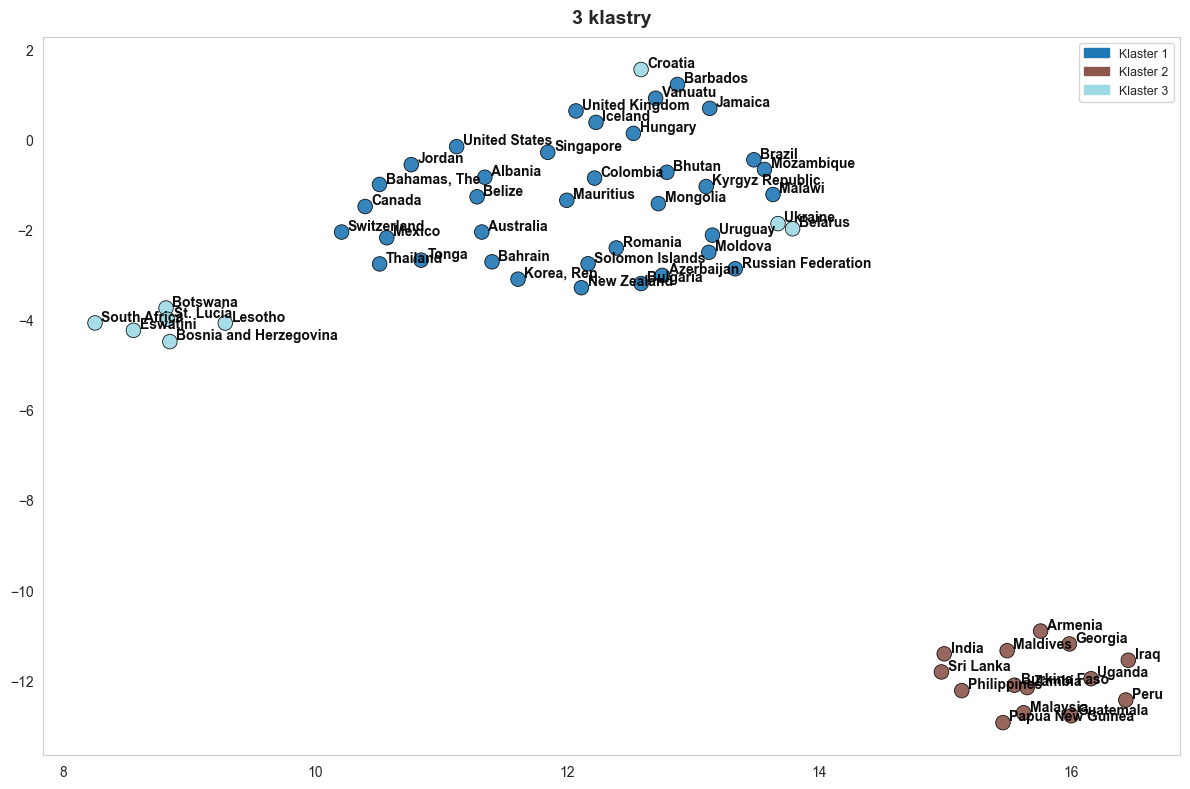

In [134]:

scaler33 = StandardScaler()
scaled_data = scaler33.fit_transform(country_means.select_dtypes(include='number'))

kmeans_3_clust = KMeans(n_clusters=3,random_state=42,init='k-means++',n_init=20,max_iter=300)
labels = kmeans_3_clust.fit_predict(scaled_data)

reducer = umap.UMAP(n_neighbors=8, min_dist=0.35, random_state=42)
X_umap = reducer.fit_transform(scaled_data)

unique = np.unique(labels)
cmap = plt.cm.get_cmap('tab20', unique.size)
plt.figure(figsize=(12,8))

plt.scatter(X_umap[:, 0],X_umap[:, 1],c=labels,cmap=cmap,s=110,edgecolor='black',
    linewidth=0.6,
    alpha=0.9
)

for i, name in enumerate(country_means['country_name'].tolist()):
    plt.text(
        X_umap[i,0] + 0.05, X_umap[i,1] + 0.05, name,
        fontsize=10, color='black', weight='bold', alpha=0.95
    )

plt.legend(handles=[mpatches.Patch(color=cmap(i), label=f"Klaster {i+1}") for i in range(unique.size)],  fontsize=9)

plt.title("3 klastry", fontsize=14, weight='bold', pad=10)
plt.grid(False)
plt.tight_layout()
plt.show()


## podsumowanie

- K-means okazal sie zdecydwoanie lepszym narzedziem niz Hierachical clustering poniewaz utworzyl podzialy z sensownymi krajami wewnatrz, oczywiscie w wiekszosci przypadkow, bo widzimy kilka krajow ktore powinny byc blizej swojego klastra, albo pomieszane kraje np Kolumbia z US albo UK razem w klastrze.

- K-means zdecydwaonie sie nadaje bardziej do klastrow kulistych, i tutaj to pokazuje.

### porownanie 3 a 5 klastrow 

**1.**
- W przypadku **k=3** model tworzy trzy szerokie grupy, które odpowiadają głównym profilom makroekonomicznym:
  - kraje stabilne (niska inflacja, umiarkowany dług), ( klaster 1)
  - gospodarki umiarkowanie niestabilne, ( klaster 3)
  - kraje o wysokiej inflacji i niestalbilnych wskaznikow fiskalnych (np. Irak, Sri Lanka, Uganda). (klaster 3)
  - Oczywiscie nie jest to podzial idealny poniewaz np jak mozna zrownywac indie z irakiem.

- Przy **k=5** model rozdziela te grupy na mniejsze, bardziej spójne podzbiory — szczególnie wśród stabilnych gospodarek,
- dobrze wylapal iraq jako osobny klaster i jako outlier , co zdecydowanie lepiej podwyzsza stabilnosc fiskalna klastra 3,

- W **k=3** podział jest zbyt ogólny — łączy gospodarki o odmiennych charakterystykach fiskalnych i monetarnych.  
- W **k=5** widoczne są **bardziej intuicyjne grupy**:
  - Klaster o wysokiej inflacji i niestabilności ( Irak, Uganda),
  - Klaster krajów afrykańskich o umiarkowanym wzroście i dużym długu (RPA, Botswana, Lesotho),
  - Klaster stabilnych, rozwiniętych gospodarek (Szwajcaria, Kanada, Australia, UK).

**5. Wnioski**
- W rezultacie podzial na 5 klastrow lepszy poniewaz jest bardziej informacyjny (mniejsze grupy i latwiej jest zobaczyc zaleznosci np ze w klastrze 4 jest mniej stabilnych panstw niz w klastrze 3 ) i samym jest bardziej zgodny z intuicja podzialu krajow na na przykald stabilne mniej/ bardziej.
- Co z reguly nie dziwi wieksza ilosc klastow zawse dzieli na mniejsze grupy u nas dodatkowo dostajemy podzial sensowny dzieki ktoremu mozmey wywnioskowac ze 

- najbardziej stabilny pod wzgledem fiskalny, wzkaznikow to  klaster 1, najmniej 5 albo 3 



# HDBSCAN 

- Jest to algorytm ktory jest ulepszeniem DBSCAN, poniewaz w dbscan musimy recznie dobierac min ilosc obserwacji w klastrze i eps czyli intuicyjnie szerokosc kola ktore otacza wybrany punkt,
HDBSCAN rozwiazuje problem dobierania eps i sam to robi empirycznie. Jest polaczniem density-based clustering i hierarchical clustering, co czyni go obecnie najlepszym algorytmem do clusteringu. ( nie wliczajac obecnego researchu w unsupervised-learningu)

- Ponowanie uzywamy UMAP poniewaz nie zakladamy liniowych zaleznosci

In [135]:
country_means_km

,Inflation_CPI,Unemployment_Rate,Interest_Rate_perc,GDP_Growth_perc,Public_Debt_perc_of_gdp,GDP_Growth_perc,Government_Revenue_perc_of_gdp
0,1.94,14.00,6.50,2.53,74.32,2.53,24.29
1,4.09,15.71,7.61,5.42,53.66,5.42,23.78
2,2.12,5.51,4.22,2.60,44.67,2.60,24.44
3,5.05,6.30,9.53,2.12,15.13,2.12,39.46
4,2.01,11.98,2.75,1.12,56.84,1.12,16.36
5,2.02,1.17,4.06,3.70,40.97,3.70,22.20
6,3.36,10.75,5.45,-0.46,106.81,-0.46,23.44
7,19.85,5.61,-6.28,1.84,31.79,1.84,29.26
8,1.11,8.36,10.02,2.62,62.07,2.62,21.52
9,6.15,3.03,8.38,4.50,83.25,4.50,18.92


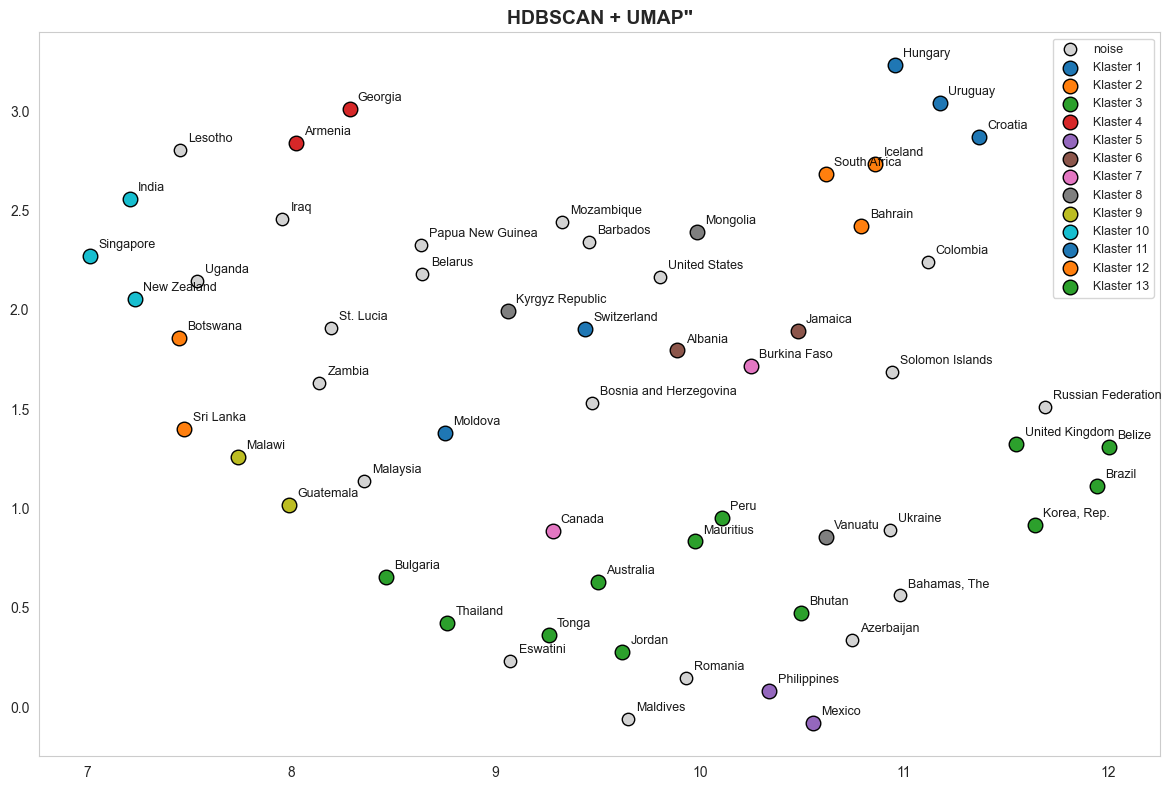

In [136]:
import hdbscan
import umap

scaler = StandardScaler()
X_scaled = scaler.fit_transform(country_means_km)


clust_2 = hdbscan.HDBSCAN(min_cluster_size=2, # zeby grupa byla uznawana za klater musi miec conajmniej 2 punkty inaczej noise -> -1
                          min_samples=1) # liczba punktow zeby klaster mogl zostac uznany za core point 

labels = clust_2.fit_predict(X_scaled)

reducer = umap.UMAP(n_neighbors=15, min_dist=0.12, metric='euclidean', random_state=42) # fitowanie u-mapu 
X_umap = reducer.fit_transform(X_scaled)

plt.figure(figsize=(12,8))

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

palette = sns.color_palette('tab10', n_colors=max(1, n_clusters))

for lbl in np.unique(labels): # kolorowanie plota
    mask = labels == lbl
    if lbl == -1:   
        plt.scatter(X_umap[mask,0], X_umap[mask,1], c='lightgray', s=80,edgecolor='black', label='noise')
    else:
        plt.scatter(X_umap[mask,0], X_umap[mask,1], c=[palette[lbl % len(palette)]], s=110,edgecolor='black', label=f'Klaster {lbl+1}')

for i, value in enumerate(data['country_name'].unique()): # podpisywanie krajow na plocie
    plt.text(X_umap[i,0]+0.04, X_umap[i,1]+0.04, value, fontsize=9, color='black', alpha=0.9) 
 
plt.title(f'HDBSCAN + UMAP"',fontsize=14, weight='bold')
plt.grid(False)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()





In [137]:
print(f"Liczba klastrow {n_clusters} noise : {int((labels == -1).sum())}")


Liczba klastrow 13 noise : 21


## Podsumowanie

- HDBSCAN wykryl 13 klastrów oraz noise points , są mniejsze bardziej szczegolowe co lepiej pokazuje lokalna sturkture polityk fiskalnych panstw np , (sri lanka malawi guatemala, botswana)
armenia, gruzja , indie singaput nowa zelandia. Nie ma juz podzialow np indie polaczone z irakiem , albo UK z jamajka , to dosyc mocno pokazuje to ze od poczaktu powinnismy zalozyc wiecej klastrow np w k-means nawet jestli elbow method tego by nie sugerowal. Co pokazuje zdecydowanie przewage w takich sytuachach density based algorytmow nad centroid based. 
Jednakze minusem jest to ze troche ciezko jest sie odnalezc na wykresie, przy wiekszej ilosci klastrow staje sie to dosyc klopotliwe.

### przykaldy podzialu klastrow 

- Klastry 1–2 ciemnoniebieskie– kraje stabilne fiskalnie (np. Szwajcaria, Węgry, Urugwaj).  
- Klastry 10–13  – gospodarki rozwijające się z wyższą inflacją i dynamicznym wzrostem (np. Brazylia, Filipiny, Malezja).  
- Klaster 3  – niestabilne gospodarki (np. Armenia, Gruzja), potencjalne outliery.  
- Szum – kraje o unikalnych profilach makro (np. wysokie zadłużenie przy niskiej inflacji).

####  Porównanie z KMeans
- HDBSCAN lepiej identyfikuje mniejsze, lokalne grupy i nietypowe kraje  
  podczas gdy KMeans tworzy wieksze, bardziej usrednione klastry.  
- Wynik potwierdza znowu nieliniowa strukture danych — kraje nie dzielą się wyłącznie na Emerging markets” i "Developed markets", lecz w obrębie tych grup istnieją dalsze podziały.
- Rownie ciezko jest podzielic kraje na 2 grup stabilne i niestabilne fiskalnie, jest duzo zaleznosci rozncyh nieliniowych przypadkow , ze staje sie (wedlug nas ) to po prostu niemozliwe, zeby jednoznacznie to stwierdzic. 

